In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import plotly.express as px
import string
from nltk.corpus import words
from collections import Counter
import re
import time
from sklearn.model_selection import cross_val_predict
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from gensim import models, corpora
from nltk.stem import PorterStemmer
from textblob import TextBlob
import os

In [2]:
df = pd.read_csv('/Users/chameleonjj/Downloads/0819_UkraineCombinedTweetsDeduped.csv', index_col=0)

In [3]:
df.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,...,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts
0,173212647,JoeMokolobetsi,Yeshua Hamashiach is THE answer | Romans 10:9-...,Afrika Borwa,219,197,4789,2010-07-31 19:09:22.000000,1560416252937617411,2022-08-19 00:00:00,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 08:07:26.836769
1,335041409,XclusivasPuebla,Somos el periódico #ExclusivasPuebla| Investi...,"Puebla, México",1419,6402,70267,2011-07-14 02:02:24.000000,1560416256179707904,2022-08-19 00:00:01,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 07:51:50.523048
2,1512400441103032323,ShelterAnimalUA,Shelter for abandoned dogs and cats. 1400 dogs...,Ukraine,782,109,1198,2022-04-08 12:02:47.000000,1560416257752666113,2022-08-19 00:00:01,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 05:12:06.194216
3,1356632630662430722,DogandCatHelpe1,Shelter for abandoned dogs and cats. 1400 dogs...,Ukraine,5,39,690,2021-02-02 15:57:12.000000,1560416257790382081,2022-08-19 00:00:01,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 11:22:26.824532
4,20297125,ElMananaOnline,Las mejores noticias de los dos Laredos y el m...,Nuevo Laredo,2269,17978,56188,2009-02-07 06:32:49.000000,1560416257937051648,2022-08-19 00:00:01,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 11:52:29.448634


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47994 entries, 0 to 47993
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   userid                   47994 non-null  int64  
 1   username                 47994 non-null  object 
 2   acctdesc                 43037 non-null  object 
 3   location                 31703 non-null  object 
 4   following                47994 non-null  int64  
 5   followers                47994 non-null  int64  
 6   totaltweets              47994 non-null  int64  
 7   usercreatedts            47994 non-null  object 
 8   tweetid                  47994 non-null  int64  
 9   tweetcreatedts           47994 non-null  object 
 10  retweetcount             47994 non-null  int64  
 11  text                     47994 non-null  object 
 12  hashtags                 47994 non-null  object 
 13  language                 47994 non-null  object 
 14  coordinates           

In [5]:
##############################################
##############################################
# PREDICTING IF THE TWEET IS WRITTEN BY HUMAN OR NOT
##############################################
##############################################

In [6]:
# Since the dataset didn't define the label for each tweet as either "human" or "non-human," 
# it is not possible to create a supervised learning model to predict whether a tweet was made by a human or not.
# Therefore I will consider:

### unsupervised learning techniques to identify patterns or anomalies in the data 
# that may suggest who created a tweet. I will:
# * use clustering algorithms to group similar tweets together based on their features,
# * use anomaly detection algorithms to identify tweets that deviate significantly from the norm,

### a hybrid approach that combines unsupervised and supervised learning.  I will:
# * use unsupervised learning to identify potential non-human tweets and then manually label a 
#   subset of these tweets to train a supervised learning model.


In [7]:
##############################################
# Understanding my data:
# userid: The unique identifier of the user who posted the tweet.
# username: The username of the user who posted the tweet.
# acctdesc: The description provided in the user's Twitter profile.
# location: The location provided in the user's Twitter profile.
# following: The number of accounts the user is following.
# followers: The number of accounts that follow the user.
# totaltweets: The total number of tweets posted by the user.
# usercreatedts: The timestamp of when the user's Twitter account was created.
# tweetid: The unique identifier of the tweet.
# tweetcreatedts: The timestamp of when the tweet was created.
# retweetcount: The number of times the tweet has been retweeted.
# text: The text of the tweet.
# hashtags: Any hashtags included in the tweet.
# language: The language of the tweet.
# coordinates: The geographic coordinates of the tweet.
# favorite_count: The number of times the tweet has been favorited.
# is_retweet: A Boolean value indicating whether the tweet is a retweet.
# original_tweet_id: The unique identifier of the original tweet, if the current tweet is a retweet.
# original_tweet_userid: The unique identifier of the user who posted the original tweet, if the current tweet is a retweet.
# original_tweet_username: The username of the user who posted the original tweet, if the current tweet is a retweet.
# in_reply_to_status_id: The unique identifier of the tweet to which this tweet is a reply, if any.
# in_reply_to_user_id: The unique identifier of the user to whom this tweet is a reply, if any.
# in_reply_to_screen_name: The username of the user to whom this tweet is a reply, if any.
# is_quote_status: A Boolean value indicating whether the tweet is a quote tweet.
# quoted_status_id: The unique identifier of the original tweet being quoted, if the current tweet is a quote tweet.
# quoted_status_userid: The unique identifier of the user who posted the original tweet being quoted, if the current tweet is a quote tweet.
# quoted_status_username: The username of the user who posted the original tweet being quoted, if the current tweet is a quote tweet.
# extractedts: The timestamp when the tweet was extracted or collected from Twitter.


In [8]:
##############################################
# Cleaning up the data: deciding on which columns I need or which columns should be converted into 
# a different type of data

In [9]:
columns_to_drop = ['username', 'tweetid', 'original_tweet_id', 'coordinates', 'extractedts', 'quoted_status_username', 'in_reply_to_screen_name', 'original_tweet_username', 'location', 'hashtags', 'in_reply_to_status_id', 'in_reply_to_user_id', 'is_quote_status', 'quoted_status_id',  'quoted_status_userid']
                     

In [10]:
df = df.drop(columns=columns_to_drop)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47994 entries, 0 to 47993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   userid                 47994 non-null  int64 
 1   acctdesc               43037 non-null  object
 2   following              47994 non-null  int64 
 3   followers              47994 non-null  int64 
 4   totaltweets            47994 non-null  int64 
 5   usercreatedts          47994 non-null  object
 6   tweetcreatedts         47994 non-null  object
 7   retweetcount           47994 non-null  int64 
 8   text                   47994 non-null  object
 9   language               47994 non-null  object
 10  favorite_count         47994 non-null  int64 
 11  is_retweet             47994 non-null  bool  
 12  original_tweet_userid  47994 non-null  int64 
dtypes: bool(1), int64(7), object(5)
memory usage: 4.8+ MB


In [12]:
# Finding out included languages
print(df['language'].unique())

['en' 'es' 'ht' 'ja' 'nl' 'und' 'ca' 'zh' 'pt' 'it' 'fr' 'no' 'pl' 'vi'
 'ka' 'de' 'tl' 'fi' 'ru' 'kn' 'tr' 'el' 'uk' 'in' 'ko' 'iw' 'ur' 'et'
 'lv' 'ar' 'da' 'ta' 'eu' 'fa' 'ro' 'hi' 'th' 'sv' 'my' 'sr' 'is' 'lt'
 'gu' 'am' 'bg' 'te' 'bn' 'sl' 'or' 'cs' 'ne' 'mr' 'ml' 'cy' 'hy' 'hu'
 'pa' 'sd' 'ps']


In [13]:
# Finding out how many English tweets are in a dataset
print(df['language'].value_counts()['en'])

23179


In [14]:
# Keeping only English tweets because the dataset with over 20000 entries is still a good size and some of
# the tools work only with English .
df = df[df['language'] == 'en']

# I no longer need 'language' column
df.drop('language', axis=1, inplace=True)

In [15]:
df_original = pd.DataFrame(df)

In [16]:
# For my analysis the 'tweet age' column will be more useful than the time tweet was created
# Converting 'tweetcreatedts' column to datetime
df['tweetcreatedts'] = pd.to_datetime(df['tweetcreatedts'])

# Seting the specific date for comparison
specific_date = pd.to_datetime('2022-08-19 00:00:00')

# Creating 'twit age' column and calculate the age of the account
df['tweet age'] = specific_date - df['tweetcreatedts']

# Converting timedelta values to seconds
df['tweet age'] = df['tweet age'].dt.seconds

In [17]:
# Figuring out the tweet frequency: the average number of tweets posted per day by a user
df['usercreatedts'] = pd.to_datetime(df['usercreatedts'])
df['tweetcreatedts'] = pd.to_datetime(df['tweetcreatedts'])

# Calculate account age in days
df['account_age_days'] = (df['tweetcreatedts'] - df['usercreatedts']).dt.days

# To avoid division by zero error for accounts less than a day old, replace 0 with 1
df['account_age_days'] = df['account_age_days'].replace(0, 1)

# Calculate tweet frequency
df['tweet_frequency'] = df['totaltweets'] / df['account_age_days']

In [18]:
columns_to_drop = ['usercreatedts', 'tweetcreatedts']

In [19]:
df = df.drop(columns=columns_to_drop)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23179 entries, 0 to 47993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 23179 non-null  int64  
 1   acctdesc               21152 non-null  object 
 2   following              23179 non-null  int64  
 3   followers              23179 non-null  int64  
 4   totaltweets            23179 non-null  int64  
 5   retweetcount           23179 non-null  int64  
 6   text                   23179 non-null  object 
 7   favorite_count         23179 non-null  int64  
 8   is_retweet             23179 non-null  bool   
 9   original_tweet_userid  23179 non-null  int64  
 10  tweet age              23179 non-null  int64  
 11  account_age_days       23179 non-null  int64  
 12  tweet_frequency        23179 non-null  float64
dtypes: bool(1), float64(1), int64(9), object(2)
memory usage: 2.3+ MB


In [21]:
df.head()

,userid,acctdesc,following,followers,totaltweets,retweetcount,text,favorite_count,is_retweet,original_tweet_userid,tweet age,account_age_days,tweet_frequency
0,173212647,Yeshua Hamashiach is THE answer | Romans 10:9-...,219,197,4789,0,Dear vaccine advocate\n\nDo take the COVID19 m...,0,False,0,0,4401,1.088162
2,1512400441103032323,Shelter for abandoned dogs and cats. 1400 dogs...,782,109,1198,0,"Animal shelter Dogs and Cats, we need your hel...",1,False,0,86399,132,9.075758
3,1356632630662430722,Shelter for abandoned dogs and cats. 1400 dogs...,5,39,690,0,"Welcome to our shelter!\nLocated in Ukraine, K...",2,False,0,86399,562,1.227758
5,1453260685530603528,A public diplomacy initiative of 🇩🇪's Federal ...,129,2509,522,0,👇 Good news you may have missed: First @WFP sh...,0,False,0,86399,295,1.769492
6,15968273,1/2 my posts will bore you. The other 1/2 will...,6013,6546,308820,0,Opinion: The Ukraine war is also being fought ...,0,False,0,86397,5107,60.469943


In [22]:
# Deleting column 'acctdesc'. Originally I thought a human account often has personal details such as a 
# location or birthday. Bots usually don't have these personal details. So I tried automatically check for it
# but the results were very poor. Hence I am not including them and deleting this feature.
df = df.drop('acctdesc', axis=1)

In [23]:
# Counting the values in the 'is_retweet' column
counts = df['is_retweet'].value_counts()
print(counts)

False    23179
Name: is_retweet, dtype: int64


In [24]:
# Deleting column 'is_retweet' since all values are the same.
df = df.drop('is_retweet', axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23179 entries, 0 to 47993
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 23179 non-null  int64  
 1   following              23179 non-null  int64  
 2   followers              23179 non-null  int64  
 3   totaltweets            23179 non-null  int64  
 4   retweetcount           23179 non-null  int64  
 5   text                   23179 non-null  object 
 6   favorite_count         23179 non-null  int64  
 7   original_tweet_userid  23179 non-null  int64  
 8   tweet age              23179 non-null  int64  
 9   account_age_days       23179 non-null  int64  
 10  tweet_frequency        23179 non-null  float64
dtypes: float64(1), int64(9), object(1)
memory usage: 2.1+ MB


In [26]:
##############################################
#Checking for spelling and grammar errors

In [27]:
# Checking for common errors made by automated systems, such as:
# *) inconsistent capitalization,
# *) unusual punctuation,
# *) misspellings. 
# Humans are generally more accurate in their language usage.

import nltk
nltk.download('words')
from nltk.corpus import words

english_words = set(words.words())

# Defining standard punctuation
standard_punctuation = set('.!?,')

def count_errors(text):
    # Checking for unusual punctuation
    all_punctuation = set(string.punctuation)
    text_punctuation = set(char for char in text if char in all_punctuation)
    unusual_punctuations = text_punctuation.difference(standard_punctuation)

    # Checking for misspellings
    words_in_text = text.lower().split()
    misspelled_words = set(words_in_text).difference(english_words)
    
    return len(unusual_punctuations), len(misspelled_words)

# Adding 2 columns to our dataframe that contain counts of errors per text
df['unusual_punctuations'], df['misspelled_words'] = zip(*df['text'].map(count_errors))


[nltk_data] Downloading package words to
[nltk_data]     /Users/chameleonjj/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [28]:
# Counting the values in the 'is_retweet' column
counts = df['misspelled_words'].value_counts()

print(counts)


11    1651
9     1561
10    1533
12    1533
8     1457
13    1372
7     1352
15    1348
14    1335
16    1190
17    1151
6     1144
18    1015
5     1005
4      743
19     646
3      617
20     528
21     345
24     307
22     305
23     237
2      164
25     159
26     115
27     106
28      64
29      43
30      41
1       28
32      25
31      16
33      13
34       8
35       5
39       3
43       2
49       1
63       1
53       1
56       1
59       1
40       1
69       1
58       1
47       1
50       1
36       1
51       1
Name: misspelled_words, dtype: int64


In [29]:
##############################################
# Checking for language patterns

In [30]:
# Analyzing the text for repetitive structures that humans are less likely to use.
import re
def find_repetitive_phrases(text):
    # Split the text into words
    words = text.split()
    repetitive_phrases = []
    
    # Seting a minimum length for a repetitive phrase
    min_phrase_length = 3

    # Checking each phrase of min_phrase_length or longer
    for i in range(len(words) - min_phrase_length + 1):
        phrase = ' '.join(words[i:i+min_phrase_length])
        # If the phrase appears more than once, it's repetitive
        if text.count(phrase) > 1:
            repetitive_phrases.append(phrase)
    
    return repetitive_phrases

# Applying to each tweet and storing the result in a new column
df['repetitive_phrases'] = df['text'].apply(find_repetitive_phrases)

In [31]:
# Analyzing the text for repetitive structures that humans are less likely to use.
def find_repetitive_phrases(text):
    # Split the text into words
    words = text.split()
    repetitive_phrases = []
    
    # Setting a minimum length for a repetitive phrase
    min_phrase_length = 3

    # Checking each phrase of min_phrase_length or longer
    for i in range(len(words) - min_phrase_length + 1):
        phrase = ' '.join(words[i:i+min_phrase_length])
        # If the phrase appears more than once, it's repetitive
        if text.count(phrase) > 1:
            repetitive_phrases.append(phrase)
    
    return repetitive_phrases

# Applying to each tweet and storing the result in a new column
df['repetitive_phrases'] = df['text'].apply(find_repetitive_phrases)

# Counting the occurrences of repetitive phrases in each tweet
df['repetitive_count'] = df['repetitive_phrases'].apply(lambda x: len(x))


In [32]:
# Deleting column 'repetitive_phrases' since we can use the column 'repetitive_count'.
df = df.drop('repetitive_phrases', axis=1)

In [33]:
# Analyzing the text for formulaic structures that humans are less likely to use.
# Checking each tweet in a DataFrame column for its POS (part of speech) structure.
# POS tagging
def get_pos_tags(text):
    tokens = nltk.word_tokenize(text)
    return [pos for word, pos in nltk.pos_tag(tokens)]

df['POS'] = df['text'].apply(get_pos_tags)

In [34]:
# Finding similar sequences of POS tags
def generate_bigrams(pos_tags):
    return list(nltk.bigrams(pos_tags))

df['POS_bigrams'] = df['POS'].apply(generate_bigrams)


In [35]:
# Counting and finding most common sequences
all_bigrams = [bigram for sublist in df['POS_bigrams'].tolist() for bigram in sublist]
counter = Counter(all_bigrams)

In [36]:
# Defining a function to count formulaic structures
def count_formulaic_structures(pos_tags):
    count = 0
    for i in range(len(pos_tags) - 1):
        if len(pos_tags[i]) > 1 and len(pos_tags[i+1]) > 1:
            if pos_tags[i][1].startswith('VB') and pos_tags[i+1][1].startswith('NN'):
                count += 1
    return count

In [37]:
# Applying the function to the 'POS' column
df['formulaic_count'] = df['POS_bigrams'].apply(count_formulaic_structures)

In [38]:
# Deleting column 'POS' and 'POS_bigrams' since we can use the column 'formulaic_count'.
df = df.drop(['POS', 'POS_bigrams'], axis=1)

In [39]:
df.head()

,userid,following,followers,totaltweets,retweetcount,text,favorite_count,original_tweet_userid,tweet age,account_age_days,tweet_frequency,unusual_punctuations,misspelled_words,repetitive_count,formulaic_count
0,173212647,219,197,4789,0,Dear vaccine advocate\n\nDo take the COVID19 m...,0,0,0,4401,1.088162,4,22,0,1
2,1512400441103032323,782,109,1198,0,"Animal shelter Dogs and Cats, we need your hel...",1,0,86399,132,9.075758,4,19,0,1
3,1356632630662430722,5,39,690,0,"Welcome to our shelter!\nLocated in Ukraine, K...",2,0,86399,562,1.227758,4,20,0,1
5,1453260685530603528,129,2509,522,0,👇 Good news you may have missed: First @WFP sh...,0,0,86399,295,1.769492,6,11,0,0
6,15968273,6013,6546,308820,0,Opinion: The Ukraine war is also being fought ...,0,0,86397,5107,60.469943,4,10,0,0


In [40]:
##############################################
# Finding URL shorteners and automation tools, because they suggest that the tweet was created by an automated system.

In [41]:
# Finding URL Shorteners

# Defining the regex pattern for URL shorteners
url_shortener_pattern = r"(https?://(?:www\.)?[\w-]+\.\w{2,3}/\S+)"

# Finding URL shorteners in the 'text' column of the DataFrame
df['url_shorteners'] = df['text'].str.extractall(url_shortener_pattern).groupby(level=0).agg(','.join)

# Counting the number of URL shorteners for each row and adding an "generic_hashtags" column
df['URL_shorteners_count'] = df['url_shorteners'].apply(lambda x: len(re.findall(url_shortener_pattern, str(x))))

In [42]:
#Finding Generic Hashtags

# Defining the regex pattern for generic hashtags
generic_hashtag_pattern = r"(?i)#\w+"

# Finding generic hashtags in the 'text' column of the DataFrame
df['generic_hashtags'] = df['text'].str.findall(generic_hashtag_pattern).apply(','.join)

# Counting the number of generic hashtags for each row and adding an "Generic_hashtags_count" column
df['Generic_hashtags_count'] = df['generic_hashtags'].str.count('#')

In [43]:
# Finding Indicators of Automation Tools
# Defining the regex pattern for indicators of automation tools
automation_indicator_pattern = r"(?i)\b(automation|bot|auto|scheduler)\b"

# Finding indicators of automation tools in the 'text' column of the DataFrame and adding an "automation_indicators"
# column
df['automation_indicators'] = df['text'].str.contains(automation_indicator_pattern)

/var/folders/p2/wvjdhhss2fgbszpq4f4wx8w80000gn/T/ipykernel_12950/3988945494.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['automation_indicators'] = df['text'].str.contains(automation_indicator_pattern)


In [44]:
# Deleting column 'generic_hashtags' and 'url_shorteners' since we can use the column 'Generic_hashtags_count'
# and 'Generic_hashtags_count' respectively.
df = df.drop(['generic_hashtags', 'url_shorteners'], axis=1)

In [45]:
##############################################
# Checking context and relevance, because humans are more likely to engage in real-time conversations and refer to 
# specific events, whereas automated tweets might lack timely references.

In [46]:
# Performing keyword  matching by useing string matching to identify tweets that contain the relevant
# keywords or hashtags.
relevant_keywords = ['ukraine', 'russia', 'war']

# Creating a new column 'relevant', which will be True if the tweet's text contains any of the relevant keywords.
df['relevant'] = df['text'].str.contains('|'.join(relevant_keywords), case=False)

In [47]:
##############################################
# Analyzing the sentiment and emotional tone of the tweet. Humans tend to express a wider range of 
# emotions and nuances, while automated systems tend to produce generic or robotic sentiments.

In [48]:
# Text cleaning

In [49]:
# 1. Removing unwanted characters such as special characters, punctuation, and digits from the text data using 
# regular expressions.
import re

df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [50]:
# 2. Converting all the text data to lowercase using the lower() function.
df['text'] = df['text'].apply(lambda x: x.lower())

In [51]:
 # 3. Removing stop words from the text data using NLTK.
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [52]:
# 4. Removing extra whitespaces from the text data using the strip() function.
df['text'] = df['text'].apply(lambda x: ' '.join(x.split()))

In [53]:
# 5. Tokenizing each word in the text data into individual tokens.
# import nltk
df['tokens'] = df['text'].apply(lambda x: nltk.word_tokenize(x))

In [54]:
# 6. Normalization: Performing lemmatization first, because it produces a more accurate base form of the word 
#.   compared to stemming, as it considers the part of speech and the context of the word in the sentence.

In [55]:
# Performing lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [56]:
# Stemming: 
stemmer = PorterStemmer()
df['stemmed'] = df['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [57]:
# Using a pre-trained sentiment analysis model TextBlob to analyze the sentiment of each tweet and 
# assigning a positive or negative label.
# Defining a function to calculate the sentiment polarity of each tweet
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Applying the get_sentiment function to the 'text' column of the dataframe
df['sentiment'] = df['text'].apply(get_sentiment)

In [58]:
# Deleting column 'text', 'tokens', 'lemmatized', 'stemmed' since we can use the column 'sentiment'
# and 'Generic_hashtags_count' respectively.
df = df.drop(['text', 'tokens', 'lemmatized', 'stemmed'], axis=1)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23179 entries, 0 to 47993
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   userid                  23179 non-null  int64  
 1   following               23179 non-null  int64  
 2   followers               23179 non-null  int64  
 3   totaltweets             23179 non-null  int64  
 4   retweetcount            23179 non-null  int64  
 5   favorite_count          23179 non-null  int64  
 6   original_tweet_userid   23179 non-null  int64  
 7   tweet age               23179 non-null  int64  
 8   account_age_days        23179 non-null  int64  
 9   tweet_frequency         23179 non-null  float64
 10  unusual_punctuations    23179 non-null  int64  
 11  misspelled_words        23179 non-null  int64  
 12  repetitive_count        23179 non-null  int64  
 13  formulaic_count         23179 non-null  int64  
 14  URL_shorteners_count    23179 non-null

In [60]:
df.head()

,userid,following,followers,totaltweets,retweetcount,favorite_count,original_tweet_userid,tweet age,account_age_days,tweet_frequency,unusual_punctuations,misspelled_words,repetitive_count,formulaic_count,URL_shorteners_count,Generic_hashtags_count,automation_indicators,relevant,sentiment
0,173212647,219,197,4789,0,0,0,0,4401,1.088162,4,22,0,1,1,11,False,False,0.050
2,1512400441103032323,782,109,1198,0,1,0,86399,132,9.075758,4,19,0,1,1,10,False,True,0.375
3,1356632630662430722,5,39,690,0,2,0,86399,562,1.227758,4,20,0,1,1,9,False,True,0.800
5,1453260685530603528,129,2509,522,0,0,0,86399,295,1.769492,6,11,0,0,1,3,False,True,0.075
6,15968273,6013,6546,308820,0,0,0,86397,5107,60.469943,4,10,0,0,1,5,False,True,0.000


In [61]:
# Using encoding for 'automation_indicators'
df['automation_indicators'] = df['automation_indicators'].map({True: 0, False: 1})

In [62]:
# Using encoding for 'relevant'
df['relevant'] = df['relevant'].map({False: 0, True: 1})

In [63]:
df.head()

,userid,following,followers,totaltweets,retweetcount,favorite_count,original_tweet_userid,tweet age,account_age_days,tweet_frequency,unusual_punctuations,misspelled_words,repetitive_count,formulaic_count,URL_shorteners_count,Generic_hashtags_count,automation_indicators,relevant,sentiment
0,173212647,219,197,4789,0,0,0,0,4401,1.088162,4,22,0,1,1,11,1,0,0.050
2,1512400441103032323,782,109,1198,0,1,0,86399,132,9.075758,4,19,0,1,1,10,1,1,0.375
3,1356632630662430722,5,39,690,0,2,0,86399,562,1.227758,4,20,0,1,1,9,1,1,0.800
5,1453260685530603528,129,2509,522,0,0,0,86399,295,1.769492,6,11,0,0,1,3,1,1,0.075
6,15968273,6013,6546,308820,0,0,0,86397,5107,60.469943,4,10,0,0,1,5,1,1,0.000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23179 entries, 0 to 47993
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   userid                  23179 non-null  int64  
 1   following               23179 non-null  int64  
 2   followers               23179 non-null  int64  
 3   totaltweets             23179 non-null  int64  
 4   retweetcount            23179 non-null  int64  
 5   favorite_count          23179 non-null  int64  
 6   original_tweet_userid   23179 non-null  int64  
 7   tweet age               23179 non-null  int64  
 8   account_age_days        23179 non-null  int64  
 9   tweet_frequency         23179 non-null  float64
 10  unusual_punctuations    23179 non-null  int64  
 11  misspelled_words        23179 non-null  int64  
 12  repetitive_count        23179 non-null  int64  
 13  formulaic_count         23179 non-null  int64  
 14  URL_shorteners_count    23179 non-null

In [65]:
# To determine if the user is a bot or human we can concentrate on "userid" column and combine the data for the 
# same users.
# Grouping by 'userid' and calculate the mean of the remaining columns
df_mean = df.groupby('userid').mean().reset_index()

# Displaying the resulting DataFrame
df_mean.info()
df_mean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10373 entries, 0 to 10372
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   userid                  10373 non-null  int64  
 1   following               10373 non-null  float64
 2   followers               10373 non-null  float64
 3   totaltweets             10373 non-null  float64
 4   retweetcount            10373 non-null  float64
 5   favorite_count          10373 non-null  float64
 6   original_tweet_userid   10373 non-null  float64
 7   tweet age               10373 non-null  float64
 8   account_age_days        10373 non-null  float64
 9   tweet_frequency         10373 non-null  float64
 10  unusual_punctuations    10373 non-null  float64
 11  misspelled_words        10373 non-null  float64
 12  repetitive_count        10373 non-null  float64
 13  formulaic_count         10373 non-null  float64
 14  URL_shorteners_count    10373 non-null

,userid,following,followers,totaltweets,retweetcount,favorite_count,original_tweet_userid,tweet age,account_age_days,tweet_frequency,unusual_punctuations,misspelled_words,repetitive_count,formulaic_count,URL_shorteners_count,Generic_hashtags_count,automation_indicators,relevant,sentiment
0,1378,14932.0,15999.5,31722.0,0.0,1.0,0.0,32098.5,5877.5,5.397193,5.00,14.00,0.0,0.5,1.0,5.00,1.0,1.0,-0.200000
1,47973,3487.0,13595.0,101484.0,0.0,1.0,0.0,29040.0,5734.0,17.698640,8.00,9.00,0.0,0.0,1.0,2.00,1.0,1.0,0.468182
2,609033,1340.0,789.0,3800.0,0.0,0.0,0.0,65958.5,5703.0,0.666316,4.25,12.25,0.0,1.0,1.0,2.75,1.0,0.5,-0.109334
3,781014,1402.0,975.0,30069.0,0.0,1.0,0.0,22599.0,5659.0,5.313483,3.00,9.00,0.0,1.0,1.0,4.00,1.0,0.0,-0.187500
4,794808,1461.0,87728.0,78531.0,0.0,0.0,0.0,32762.0,5653.0,13.891916,4.00,12.00,0.0,3.0,1.0,2.00,1.0,0.0,-0.358333


In [66]:
# Setting 'userid' as an index so we coud later reingineer the data
df_mean.set_index("userid", inplace=True)

In [67]:
data = df_mean.copy()

In [68]:
#Checking for missing values
missing_vals=df_mean.isnull().sum()
print(missing_vals)

following                 0
followers                 0
totaltweets               0
retweetcount              0
favorite_count            0
original_tweet_userid     0
tweet age                 0
account_age_days          0
tweet_frequency           0
unusual_punctuations      0
misspelled_words          0
repetitive_count          0
formulaic_count           0
URL_shorteners_count      0
Generic_hashtags_count    0
automation_indicators     0
relevant                  0
sentiment                 0
dtype: int64


In [69]:
df_mean_back_up = df_mean.copy()

In [70]:
# Scaling the Data
df_scaled = (df_mean - df_mean.mean()) / df_mean.std()
print(df_scaled.shape)
print(type(df_scaled))

(10373, 18)
<class 'pandas.core.frame.DataFrame'>


In [71]:
#Checking for missing values
missing_vals=df_scaled.isnull().sum()
print(missing_vals)

following                     0
followers                     0
totaltweets                   0
retweetcount                  0
favorite_count                0
original_tweet_userid     10373
tweet age                     0
account_age_days              0
tweet_frequency               0
unusual_punctuations          0
misspelled_words              0
repetitive_count              0
formulaic_count               0
URL_shorteners_count          0
Generic_hashtags_count        0
automation_indicators         0
relevant                      0
sentiment                     0
dtype: int64


In [72]:
# I will remove column'original_tweet_userid' since all data is missing:
df_scaled = df_scaled.drop(['original_tweet_userid'], axis=1)

In [73]:
#Checking for missing values
missing_vals=df_scaled.isnull().sum()
print(missing_vals)

following                 0
followers                 0
totaltweets               0
retweetcount              0
favorite_count            0
tweet age                 0
account_age_days          0
tweet_frequency           0
unusual_punctuations      0
misspelled_words          0
repetitive_count          0
formulaic_count           0
URL_shorteners_count      0
Generic_hashtags_count    0
automation_indicators     0
relevant                  0
sentiment                 0
dtype: int64


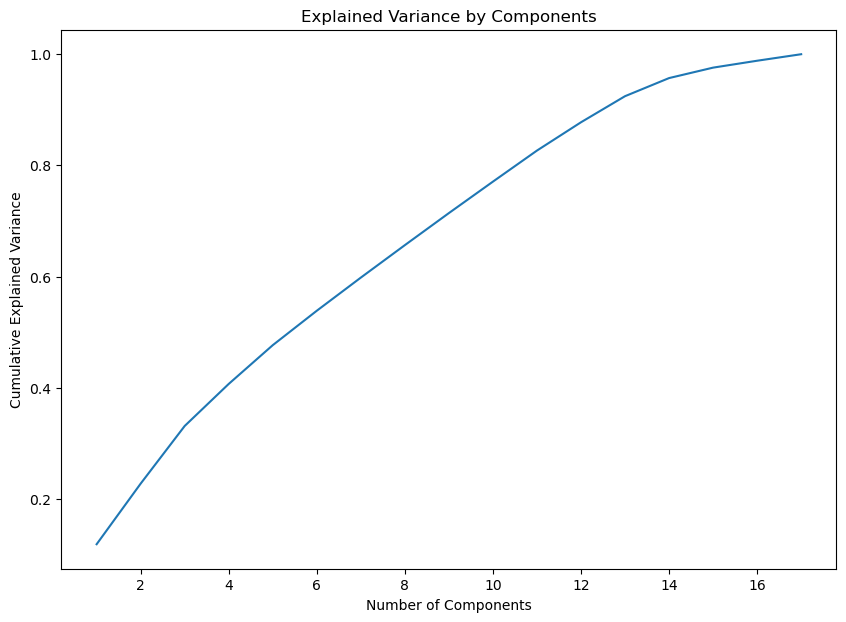

In [74]:
# Fiting PCA without specifying n_components to retain all the components
pca = PCA(random_state=42)
pca.fit(df_scaled)

# Ploting the variance ratio
plt.figure(figsize=(10,7))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [75]:
# Based on the above graph, I choose the number of components where the increase in explained variance 
# becomes negligible (elbow point) to be 12. This is the point at which adding more components doesn't
# provide much more useful information
n_components = 12

In [76]:
# Applying PCA with the optimal number of components
pca_optimal = PCA(n_components=n_components, random_state=42)
components_optimal = pca_optimal.fit_transform(df_scaled)
print(type(components_optimal))
print(components_optimal.shape)
pca_optimal_dfcol = pd.DataFrame(components_optimal)
pca_optimal_dfcol.head(5)

<class 'numpy.ndarray'>
(10373, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.581937,1.180784,-0.769644,-1.568609,-1.646585,1.444435,0.166264,0.161038,0.181656,-0.387238,-1.146204,1.264425
1,-0.850376,1.435926,-0.858552,-0.948466,-2.674887,0.205628,-0.320780,-0.102896,-0.269389,1.244550,0.402144,-1.010570
2,0.001223,0.377338,-0.298556,-2.027812,-0.600346,-0.288867,0.900904,0.177753,0.923348,-0.181437,-0.224431,-0.020216
3,0.728776,0.187696,-0.412772,-1.210149,-0.805055,0.393271,1.208210,-0.296138,-0.235112,-0.559522,1.089553,1.203615
4,0.358411,0.932714,-0.885882,-3.346988,0.682811,0.800929,0.962812,0.020443,-0.308862,-1.258148,1.717315,0.387523


In [77]:
# Renaming the columns of pca_optimal_dfcol to 'pca1', 'pca2', and 'pca3'. 
#pca_optimal_dfcol.columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12'
  #                          ]

In [78]:
#########################################
#########################################
#########################################
# Applying clustering algorithms to the selected features in hopes to isolate a group of users that are bots 
# and not humans.

In [79]:
#########################################
# DBSCAN Algorithm - I did run it but the results were much worse than K-Means so I didn't includde it

In [80]:
#########################################
# K_MEANS Algorithm

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/clust

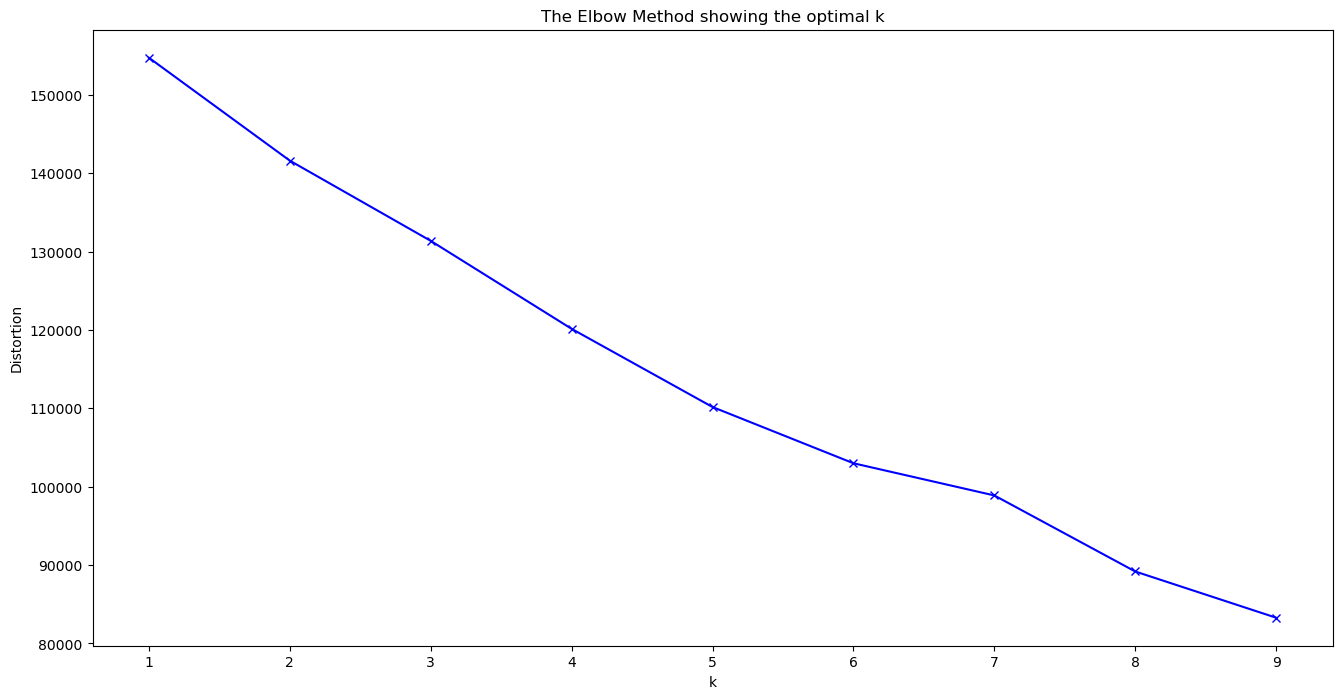

In [81]:
# Determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(pca_optimal_dfcol)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [82]:
# In the above plot, the "elbow" (the point of inflection on the curve) is 6 so I will have 6 clusters.

# Fitting the model for 6 clusters.
kmeans = KMeans(n_clusters=6, random_state=42).fit(components_optimal)
pca_optimal_dfcol['cluster'] = kmeans.labels_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


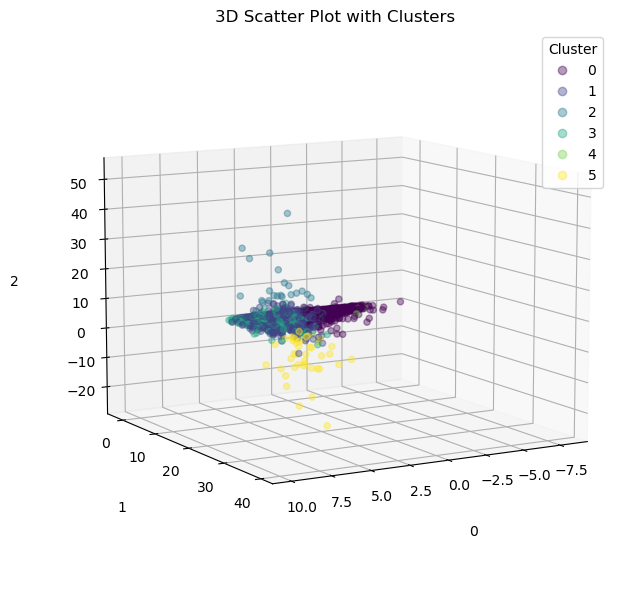

In [83]:
plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(pca_optimal_dfcol['pca1'], pca_optimal_dfcol['pca2'], pca_optimal_dfcol['pca3'], c=pca_optimal_dfcol["cluster"], alpha=0.4)

# Adding legend
legend = ax.legend(*scatter.legend_elements(), title="Cluster")

ax.set_xlabel('0', labelpad=20)
ax.set_ylabel('1', labelpad=20)
ax.set_zlabel('2', labelpad=20)
ax.view_init(10, 60)
plt.title('TBD')
plt.tight_layout()

# Set the title
ax.set_title("3D Scatter Plot with Clusters")

plt.show()


In [84]:
print(pca_optimal_dfcol["cluster"].value_counts())

1    5700
0    2439
3    2155
5      42
2      21
4      16
Name: cluster, dtype: int64


In [85]:
data['cluster'] = kmeans.labels_

In [86]:
data_cluster = data.copy()
data_cluster_0 = data_cluster.copy()
data_cluster_0 = data_cluster.query("cluster == 0")
data_cluster_1 = data_cluster.copy()
data_cluster_1 = data_cluster.query("cluster == 1")
data_cluster_2 = data_cluster.copy()
data_cluster_2 = data_cluster.query("cluster == 2")
data_cluster_3 = data_cluster.copy()
data_cluster_3 = data_cluster.query("cluster == 3")
data_cluster_4 = data_cluster.copy()
data_cluster_4 = data_cluster.query("cluster == 4")
data_cluster_5 = data_cluster.copy()
data_cluster_5 = data_cluster.query("cluster == 5")

In [87]:
# Grouping the 'text' column of the df_original DataFrame by 'userid'
df_combined = df_original.groupby('userid')['text'].apply(' '.join).reset_index()

In [88]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10373 entries, 0 to 10372
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userid  10373 non-null  int64 
 1   text    10373 non-null  object
dtypes: int64(1), object(1)
memory usage: 162.2+ KB


In [89]:
#########################################
# Now I will use a hybrid approach that combines unsupervised and supervised learning. 
# Thanks to K-means we have 6 clusters. I will select some of them and manually decide if the tweet is human made or not.
# Ideally the clusters 5, 4, 2 will have a high bot made tweets ratio. In order to create a good algorithm the 
# distribution of bot and human tweets should be as close as possible to 50/50 ratio in training and testing data.
# My goal is to manually decide for 1000 users if they are bot or human. Then we will select best algorithm to 
# classify the tweeter user as human or bot.


In [90]:
##### CLUSTER 5: getting user IDs

In [91]:
data_cluster_5.reset_index(inplace=True)

In [92]:
user_ids = data_cluster_5['userid'].tolist()

# Printing the values in a single line
print('User IDs:', ', '.join(str(user_id) for user_id in user_ids))

User IDs: 6509832, 14499829, 16086855, 17710740, 18071358, 19897138, 20442930, 20751449, 23026561, 27007409, 34245009, 36327407, 37034483, 39743812, 40173650, 44839509, 100986964, 118794845, 134758540, 149585330, 169670184, 236770150, 240649814, 243133079, 256495314, 283604227, 303862998, 444284249, 1115874631, 1420660507, 3534222021, 4230938057, 755057200901398528, 857936728165896204, 937962626222497793, 1225793633342935043, 1404071707296534537, 1495855082734297095, 1499763123603050497, 1504585869382012934, 1528856711725031425, 1551377372229820421


In [93]:
selected_userids = [6509832, 14499829, 16086855, 17710740, 18071358, 19897138, 20442930, 20751449, 23026561, 27007409, 34245009, 36327407, 37034483, 39743812, 40173650, 44839509, 100986964, 118794845, 134758540, 149585330, 169670184, 236770150, 240649814, 243133079, 256495314, 283604227, 303862998, 444284249, 1115874631, 1420660507, 3534222021, 4230938057, 755057200901398528, 857936728165896204, 937962626222497793, 1225793633342935043, 1404071707296534537, 1495855082734297095, 1499763123603050497, 1504585869382012934, 1528856711725031425, 1551377372229820421]

df_cl_5 = df_combined[df_combined['userid'].isin(selected_userids)]


In [94]:
df_cl_5.to_csv('/Users/chameleonjj/Downloads/df_cl_5.csv', index=False)

In [95]:
##### CLUSTER 4: getting user IDs

In [96]:
data_cluster_4.reset_index(inplace=True)

In [97]:
user_ids = data_cluster_4['userid'].tolist()

# Printing the values in a single line
print('User IDs:', ', '.join(str(user_id) for user_id in user_ids))

User IDs: 91608548, 114482184, 246062108, 2903980267, 3329596876, 822614698692591617, 909114160713289728, 995500354379841537, 1054986993145430016, 1128323858350661634, 1227869654783287297, 1234218497447735302, 1263456203386036224, 1364128011822370816, 1442161841912700929, 1524790392541130753


In [98]:
selected_userids = [91608548, 114482184, 246062108, 2903980267, 3329596876, 822614698692591617, 909114160713289728, 995500354379841537, 1054986993145430016, 1128323858350661634, 1227869654783287297, 1234218497447735302, 1263456203386036224, 1364128011822370816, 1442161841912700929, 1524790392541130753]
df_cl_4 = df_combined[df_combined['userid'].isin(selected_userids)]


In [99]:
df_cl_4.to_csv('/Users/chameleonjj/Downloads/df_cl_4.csv', index=False)

In [100]:
##### CLUSTER 2: getting user IDs

In [101]:
data_cluster_2.reset_index(inplace=True)

In [102]:
user_ids = data_cluster_2['userid'].tolist()

# Printing the values in a single line
print('User IDs:', ', '.join(str(user_id) for user_id in user_ids))

User IDs: 16133530, 19536434, 27493883, 60887207, 163018653, 262219168, 630995607, 1009546724, 1042307696, 2916451034, 3899254043, 725621830837501952, 792054557501038592, 818837224003289088, 888449203688677377, 941287588056518656, 1292849327107448835, 1364639441604800513, 1495480590572961792, 1505481949854502915, 1523290195650658305


In [103]:
selected_userids = [16133530, 19536434, 27493883, 60887207, 163018653, 262219168, 630995607, 1009546724, 1042307696, 2916451034, 3899254043, 725621830837501952, 792054557501038592, 818837224003289088, 888449203688677377, 941287588056518656, 1292849327107448835, 1364639441604800513, 1495480590572961792, 1505481949854502915, 1523290195650658305]
df_cl_2 = df_combined[df_combined['userid'].isin(selected_userids)]

In [104]:
df_cl_2.to_csv('/Users/chameleonjj/Downloads/df_cl_2.csv', index=False)

In [105]:
##### 
##### 
##### 
# I am 921 tweets away from my goal of 1000 tweets for training and testing. I decided to randomly choose 307 
# users from each of the 3 remaining clusters

In [106]:
##### CLUSTER 0: randomly getting user IDs

In [107]:
data_cluster_0.reset_index(inplace=True)

In [108]:
import random

user_ids = data_cluster_0['userid'].tolist()

# Randomly select 307 user IDs
selected_user_ids = random.sample(user_ids, 307)

In [109]:
df_cl_0 = df_combined[df_combined['userid'].isin(selected_user_ids)]

In [110]:
df_cl_0.to_csv('/Users/chameleonjj/Downloads/df_cl_0.csv', index=False)

In [111]:
##### CLUSTER 1: randomly getting user IDs

In [112]:
data_cluster_1.reset_index(inplace=True)

In [113]:
user_ids = data_cluster_1['userid'].tolist()

# Randomly select 307 user IDs
selected_user_ids = random.sample(user_ids, 307)

In [114]:
df_cl_1 = df_combined[df_combined['userid'].isin(selected_user_ids)]

In [115]:
df_cl_1.to_csv('/Users/chameleonjj/Downloads/df_cl_1.csv', index=False)

In [116]:
##### CLUSTER 3: randomly getting user IDs

In [117]:
data_cluster_3.reset_index(inplace=True)

In [118]:
user_ids = data_cluster_3['userid'].tolist()

# Randomly select 607 user IDs
selected_user_ids = random.sample(user_ids, 607)

In [119]:
df_cl_3 = df_combined[df_combined['userid'].isin(selected_user_ids)]

In [120]:
df_cl_3.to_csv('/Users/chameleonjj/Downloads/df_cl_3.csv', index=False)

In [121]:
##### 
##### 
##### 
# I manualy added a column to each file  'bot or human' and decided if the user is actually human (h) or bot(b).
# It is important to note that bots these days can write in a human way; on another hand some human tweets can 
# sound like bots since some of them are not written by native speakers or were written under the influence...
# but I did my best to decide on it. 
# Unfortunately the ratio of bots to humans was 1:4 which wouldn't create a good algorithm.
# I decided to settle on 2:3 ratio. To achieve it I had to randomly select from all files 500 human
# records and discrd them. I still tried to do it proportionately according to the cluster size .
# Now I will merge these files into 1 file.

In [122]:
# Defining the directory where your files are located
directory = '/Users/chameleonjj/Downloads/Bot_human/'

# List of files to be merged
files = ['Bot_human_cl_0.csv', 'Bot_human_cl_1.csv', 'Bot_human_cl_2.csv', 
         'Bot_human_cl_3.csv', 'Bot_human_cl_4.csv', 'Bot_human_cl_5.csv']

# Adding directory path to each file in the list
files = [directory + file for file in files]

# Loading and concatenating the dataframes
df_list = [pd.read_csv(file) for file in files]
merged_df = pd.concat(df_list, ignore_index=True)

# Now merged_df contains the merged data from all csv files

In [123]:
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   bot or human  492 non-null    object
 1   userid        492 non-null    int64 
 2   text          492 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.7+ KB


,bot or human,userid,text
0,b,19166335,"Biden heads back to Delaware beach house, wher..."
1,b,20379779,Germany supports russian Nazi! #Nordstream2 #...
2,b,22873354,.@Forbes | Blasts Rock #Russian Bases All Arou...
3,b,37222728,@NikkiHaley #BuildBackBetter conundrum:\n\nSo ...
4,b,49140008,Don't Believe The Dems: We Will Sweep The Sena...


In [124]:
print(merged_df['bot or human'].value_counts())

h     282
b     209
b       1
Name: bot or human, dtype: int64


In [125]:
# Removing leading and trailing whitespace from the 'bot or human' 
merged_df['bot or human'] = merged_df['bot or human'].str.strip()
print(merged_df['bot or human'].value_counts())


h    282
b    210
Name: bot or human, dtype: int64


In [126]:
# Merging merged_df and df_mean to add 'bot or human' column to get test and train data to build an ML model

In [127]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10373 entries, 1378 to 1560743749847859201
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   following               10373 non-null  float64
 1   followers               10373 non-null  float64
 2   totaltweets             10373 non-null  float64
 3   retweetcount            10373 non-null  float64
 4   favorite_count          10373 non-null  float64
 5   original_tweet_userid   10373 non-null  float64
 6   tweet age               10373 non-null  float64
 7   account_age_days        10373 non-null  float64
 8   tweet_frequency         10373 non-null  float64
 9   unusual_punctuations    10373 non-null  float64
 10  misspelled_words        10373 non-null  float64
 11  repetitive_count        10373 non-null  float64
 12  formulaic_count         10373 non-null  float64
 13  URL_shorteners_count    10373 non-null  float64
 14  Generic_hashtags_coun

In [128]:
df_mean['index'] = df_mean.index

In [129]:
df_mean = df_mean.merge(merged_df[['userid', 'bot or human']], on='userid', how='left')

In [130]:
print(df_mean['bot or human'].value_counts())

h    282
b    210
Name: bot or human, dtype: int64


In [131]:
# Converting 'bot or human' into a binary variable
df_mean['bot or human'] = df_mean['bot or human'].replace({'b': '0', 'h': '1'})

In [132]:
print(df_mean['bot or human'].value_counts())

1    282
0    210
Name: bot or human, dtype: int64


In [133]:
df_mean_all=df_mean.copy()

In [134]:
# Removing rows that have NaN in column 'bot or human'
df_mean = df_mean.dropna(subset=['bot or human'])

In [135]:
# Converting to float
df_mean['bot or human'] = pd.to_numeric(df_mean['bot or human'])

In [136]:
# Spliting the dataframe into the feature columns and the target column
X = df_mean.drop('bot or human', axis=1)
y = df_mean['bot or human']

1    282
0    210
Name: bot or human, dtype: int64


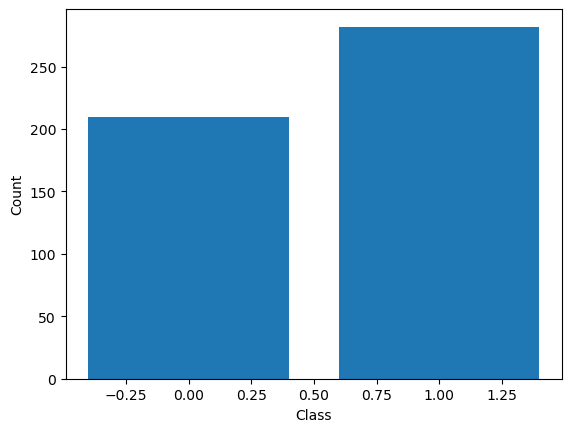

In [137]:
# Checking if the dataset is balanced
class_counts = df_mean['bot or human'].value_counts()
print(class_counts)
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [138]:
# Spliting the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [139]:
# StandardScaler works best with features that have a normal distribution.
# Using Shapiro-Wilk test if features have normal distribution.
for col in X.columns:
    stat, p = shapiro(X[col])
    alpha = 0.05
    if p > alpha:
        print(f'{col} is normally distributed (fail to reject H0)')
    else:
        print(f'{col} is not normally distributed (reject H0)')

userid is not normally distributed (reject H0)
following is not normally distributed (reject H0)
followers is not normally distributed (reject H0)
totaltweets is not normally distributed (reject H0)
retweetcount is not normally distributed (reject H0)
favorite_count is not normally distributed (reject H0)
original_tweet_userid is normally distributed (fail to reject H0)
tweet age is not normally distributed (reject H0)
account_age_days is not normally distributed (reject H0)
tweet_frequency is not normally distributed (reject H0)
unusual_punctuations is not normally distributed (reject H0)
misspelled_words is not normally distributed (reject H0)
repetitive_count is not normally distributed (reject H0)
formulaic_count is not normally distributed (reject H0)
URL_shorteners_count is not normally distributed (reject H0)
Generic_hashtags_count is not normally distributed (reject H0)
automation_indicators is not normally distributed (reject H0)
relevant is not normally distributed (reject H0

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [140]:
# Since majority of features are not normally distributed I will use MinMaxScaler
# Scaling the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [141]:
#########################################
#########################################
#########################################
# I am trying to predict whether a Twitter user is a bot or human based on a variety of features. This is 
# a binary classification problem, which can be solved by several machine learning algorithms. I will explore:
# * Logistic Regression, 
# * Random Forest, 
# * Support Vector Machines
# * KNN
# * Decision Tree

In [142]:
# Before I build our first model, I want to establish a baseline to judge my models against it. 
# Creating the baseline model
class_counts = df_mean['bot or human'].value_counts()
majority_class = class_counts.idxmax()
y_baseline = np.full(df_mean.shape[0], majority_class)
accuracy = accuracy_score(df_mean['bot or human'], y_baseline)
print(f'The baseline performance that our classifier should aim to beat is accuracy of {accuracy}')

The baseline performance that our classifier should aim to beat is accuracy of 0.573170731707317


Classifier: Logistic Regression
Training time: 0.00s
Training accuracy: 0.79135
Testing accuracy: 0.77778
Cross-validation scores: [0.82278481 0.75949367 0.72151899 0.80769231 0.82051282]
Mean cross-validation accuracy: 0.78640
Standard deviation of cross-validation accuracy: 0.03968
Precision: 0.76923
Recall: 0.87719
F1 score: 0.81967
AUC: 0.76003

Classifier: KNN
Training time: 0.00s
Training accuracy: 0.86514
Testing accuracy: 0.75758
Cross-validation scores: [0.86075949 0.72151899 0.7721519  0.73076923 0.83333333]
Mean cross-validation accuracy: 0.78371
Standard deviation of cross-validation accuracy: 0.05514
Precision: 0.77966
Recall: 0.80702
F1 score: 0.79310
AUC: 0.74875

Classifier: Decision Tree
Training time: 0.00s
Training accuracy: 1.00000
Testing accuracy: 0.68687
Cross-validation scores: [0.79746835 0.67088608 0.6835443  0.74358974 0.76923077]
Mean cross-validation accuracy: 0.73294
Standard deviation of cross-validation accuracy: 0.04875
Precision: 0.73214
Recall: 0.7193

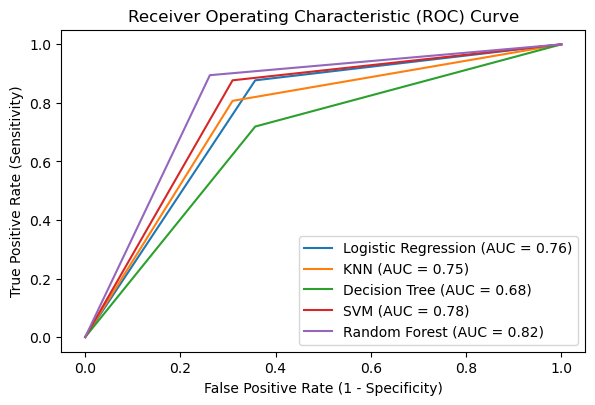

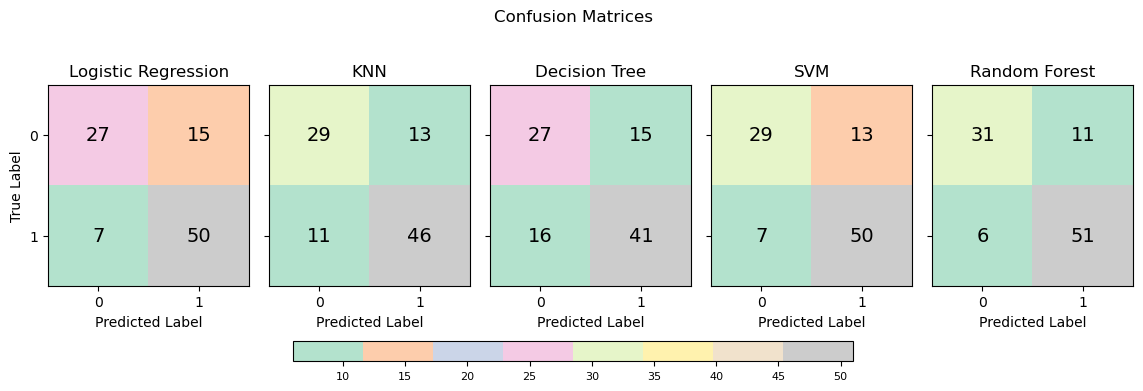

,Training time,Training accuracy,Testing accuracy
Logistic Regression,0.003947,0.791349,0.777778
KNN,0.000430,0.865140,0.757576
Decision Tree,0.002779,1.000000,0.686869
SVM,0.006807,0.842239,0.797980
Random Forest,0.096760,1.000000,0.828283


In [143]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the classifiers
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
svm = SVC()
rf = RandomForestClassifier() # Initialize Random Forest classifier

# Initialize the dictionary
confusion_matrix_dict = {}

# Training and evaluating the classifiers
for clf, clf_name in [(logreg, 'Logistic Regression'), (knn, 'KNN'), (dt, 'Decision Tree'), (svm, 'SVM'), (rf, 'Random Forest')]: # Added Random Forest here
    
    start_time = time.time()
    clf.fit(X_train_scaled, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    
    # Predicting using the trained classifier
    y_pred_train = clf.predict(X_train_scaled)
    training_accuracy = accuracy_score(y_train, y_pred_train)
    
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1, zero_division=1)
    recall = recall_score(y_test, y_pred, pos_label=1, zero_division=1)
    f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=1)
    auc_score = roc_auc_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Plotting ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')
  
    # Storing confusion matrix in dictionary
    confusion_matrix_dict[clf_name] = confusion
    
    # Creating dictionary to hold results for this model
    results = {}
    results['Training time'] = training_time
    results['Training accuracy'] = training_accuracy
    results['Testing accuracy'] = accuracy
    
    # Adding results to table
    if clf_name == 'Logistic Regression':
        table = pd.DataFrame(results, index=[clf_name])
    else:
        table = pd.concat([table, pd.DataFrame(results, index=[clf_name])])

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    print(f'Classifier: {clf_name}')
    print(f'Training time: {training_time:.2f}s')
    print(f'Training accuracy: {training_accuracy:.5f}')
    print(f'Testing accuracy: {accuracy:.5f}')
    print(f'Cross-validation scores: {cv_scores}')
    print(f'Mean cross-validation accuracy: {cv_scores.mean():.5f}')
    print(f'Standard deviation of cross-validation accuracy: {cv_scores.std():.5f}')
    print(f'Precision: {precision:.5f}')
    print(f'Recall: {recall:.5f}')
    print(f'F1 score: {f1:.5f}')
    print(f'AUC: {auc_score:.5f}')
    print()


# Plotting ROC curves
plt.legend()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.tight_layout()
plt.gcf().set_size_inches(6,4)
plt.show()


# Plotting confusion matrices
fig, axs = plt.subplots(1, 5, figsize=(14, 4), sharex=True, sharey=True)  # Update figsize to accommodate all subplots
fig.suptitle('Confusion Matrices')

for i, clf_name in enumerate(['Logistic Regression', 'KNN', 'Decision Tree', 'SVM', 'Random Forest']):  # Include Random Forest
    confusion = confusion_matrix_dict[clf_name]
    im = axs[i].imshow(confusion, cmap='Pastel2', interpolation='None')
    axs[i].set_xticks([0, 1])
    axs[i].set_yticks([0, 1])
    axs[i].set_xlabel('Predicted Label')
    
    if i == 0:
        axs[i].set_ylabel('True Label')
    axs[i].set_title(f'{clf_name}')
    
    for j in range(2):
        for k in range(2):
            axs[i].text(k, j, str(confusion[j, k]), horizontalalignment='center', verticalalignment='center', fontsize=14)

# Adding colorbar under plot's title
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.05])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=8)

# Adjusting spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

table.head()


In [144]:
# RESULTS
# Based on the testing accuracy, the SVM classifier performs the best among the five classifiers, achieving an accuracy of 0.79798. It is followed closely by the Random Forest classifier with an accuracy of 0.78788. The Logistic Regression classifier also performs reasonably well with an accuracy of 0.77778.

# When considering other evaluation metrics like precision, recall, F1 score, and AUC, the SVM classifier consistently shows good performance across all metrics, indicating its effectiveness in distinguishing between human and bot Twitter users.


Classifier: Logistic Regression
Best hyperparameters: {'C': 1, 'penalty': 'l1'}
Training time: 0.10s
Training accuracy: 0.8142
Testing accuracy: 0.7778
Cross-validation scores: [0.79746835 0.78481013 0.73417722 0.80769231 0.82051282]
Mean cross-validation accuracy: 0.7889
Standard deviation of cross-validation accuracy: 0.0298
Precision: 0.7692
Recall: 0.8772
F1 score: 0.8197
AUC: 0.7600

Classifier: KNN
Best hyperparameters: {'n_neighbors': 5}
Training time: 0.10s
Training accuracy: 0.8651
Testing accuracy: 0.7576
Cross-validation scores: [0.79746835 0.78481013 0.73417722 0.80769231 0.82051282]
Mean cross-validation accuracy: 0.7889
Standard deviation of cross-validation accuracy: 0.0298
Precision: 0.7797
Recall: 0.8070
F1 score: 0.7931
AUC: 0.7487

Classifier: Decision Tree
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5}
Training time: 0.10s
Training accuracy: 0.8906
Testing accuracy: 0.7475
Cross-validation scores: [0.79746835 0.78481013 0.73417722 0.80769231 0.820512

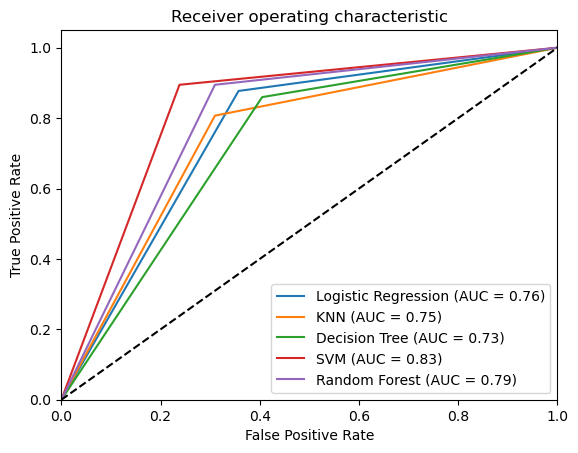

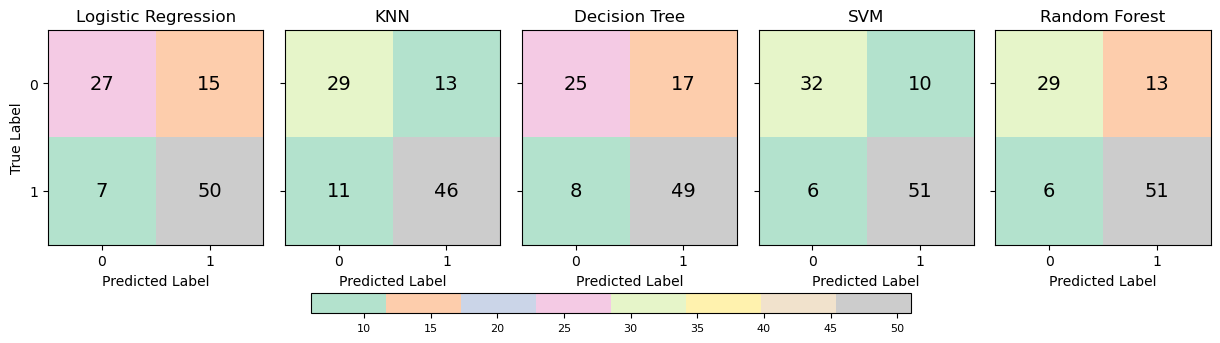

,Training time,Training accuracy,Testing accuracy
Logistic Regression,0.09676,0.814249,0.777778
KNN,0.09676,0.865140,0.757576
Decision Tree,0.09676,0.890585,0.747475
SVM,0.09676,0.867684,0.838384
Random Forest,0.09676,1.000000,0.808081


In [145]:
# Running the models and checking for best parameters.
# Initializing the classifiers with a range of hyperparameters
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=1000, solver='liblinear')
dt = DecisionTreeClassifier()
svm = SVC()
rf = RandomForestClassifier()

knn_param_grid = {'n_neighbors': [3, 5, 7]}
logreg_param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
dt_param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15]}
svm_param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
rf_param_grid = {'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15]}

# Training and evaluating the classifiers
for clf, clf_name, param_grid in [(logreg, 'Logistic Regression', logreg_param_grid), 
                                  (knn, 'KNN', knn_param_grid), 
                                  (dt, 'Decision Tree', dt_param_grid),
                                  (svm, 'SVM', svm_param_grid),
                                  (rf, 'Random Forest', rf_param_grid)]:
    clf_gs = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

    clf_gs.fit(X_train_scaled, y_train)
    
    # Predicting using the best hyperparameters
    clf = clf_gs.best_estimator_
    y_pred_train = clf.predict(X_train_scaled)
    training_accuracy = accuracy_score(y_train, y_pred_train)
    
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    auc_score = roc_auc_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Plotting ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')
    
    # Storing confusion matrix in dictionary
    confusion_matrix_dict[clf_name] = confusion
    
    # Creating dictionary to hold results for this model
    results = {}
    results['Training time'] = training_time
    results['Training accuracy'] = training_accuracy
    results['Testing accuracy'] = accuracy
    
    # Adding results to table
    if clf_name == 'Logistic Regression':
        table = pd.DataFrame(results, index=[clf_name])
    else:
        table = pd.concat([table, pd.DataFrame(results, index=[clf_name])])

    # Printing best hyperparameters and performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Best hyperparameters: {clf_gs.best_params_}')
    print(f'Training time: {training_time:.2f}s')
    print(f'Training accuracy: {training_accuracy:.4f}')
    print(f'Testing accuracy: {accuracy:.4f}')
    print(f'Cross-validation scores: {cv_scores}')
    print(f'Mean cross-validation accuracy: {cv_scores.mean():.4f}')
    print(f'Standard deviation of cross-validation accuracy: {cv_scores.std():.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 score: {f1:.4f}')
    print(f'AUC: {auc_score:.4f}')
    print()
    
# Plotting ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')

# Plotting confusion matrices
fig, axs = plt.subplots(1, 5, figsize=(15, 4), sharex=True, sharey=True)

for i, clf_name in enumerate(['Logistic Regression', 'KNN', 'Decision Tree', 'SVM', 'Random Forest']):
    confusion = confusion_matrix_dict[clf_name]
    im = axs[i].imshow(confusion, cmap='Pastel2', interpolation='None')
    axs[i].set_xticks([0, 1])
    axs[i].set_yticks([0, 1])
    axs[i].set_xlabel('Predicted Label')
    
    if i == 0:
        axs[i].set_ylabel('True Label')
    axs[i].set_title(f'{clf_name}')
    
    for j in range(2):
        for k in range(2):
            axs[i].text(k, j, str(confusion[j, k]), horizontalalignment='center', verticalalignment='center', fontsize=14)

# Adding colorbar under plot's title
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.05])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=8)

# Adjusting spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

#Printing table of results
table.head()

In [146]:
############
# Figuring out which users are bots

In [147]:
# Removing all rows where 'bot or human' column is either 'b' or 'h'
df_mean_all = df_mean_all[~df_mean_all['bot or human'].isin(['0', '1'])]

In [148]:
df_mean_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9881 entries, 0 to 10372
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   userid                  9881 non-null   int64  
 1   following               9881 non-null   float64
 2   followers               9881 non-null   float64
 3   totaltweets             9881 non-null   float64
 4   retweetcount            9881 non-null   float64
 5   favorite_count          9881 non-null   float64
 6   original_tweet_userid   9881 non-null   float64
 7   tweet age               9881 non-null   float64
 8   account_age_days        9881 non-null   float64
 9   tweet_frequency         9881 non-null   float64
 10  unusual_punctuations    9881 non-null   float64
 11  misspelled_words        9881 non-null   float64
 12  repetitive_count        9881 non-null   float64
 13  formulaic_count         9881 non-null   float64
 14  URL_shorteners_count    9881 non-null  

In [149]:
value_counts = df_mean_all['bot or human'].value_counts()
print(value_counts)

Series([], Name: bot or human, dtype: int64)


In [150]:
df_mean_all = df_mean_all.drop('bot or human', axis=1)

In [151]:
# Initializing the SVM model with the best parameters
best_svm_model = SVC(C=10, gamma='scale', kernel='rbf')  # Use SVC from sklearn.svm

# Fiting the SVM model on training data (X_train_scaled and y_train from your previous code)
best_svm_model.fit(X_train_scaled, y_train)

# Preparing the data in df_mean_all for prediction
# Scaling the data in the same way as my training data
scaler = MinMaxScaler()
X_predict = df_mean_all 
X_predict_scaled = scaler.fit_transform(X_predict)

# Using the trained model to make predictions
predictions = best_svm_model.predict(X_predict_scaled)

# Filling the 'bot or human' column with the predicted values
df_mean_all['bot or human'] = predictions


In [152]:
value_counts = df_mean_all['bot or human'].value_counts()
print(value_counts)

1    7702
0    2179
Name: bot or human, dtype: int64


In [153]:
# My model predicted that there are 7702 human tweeter users and 2179 bot tweeter users.

In [154]:
#########################################
#########################################
# CREATING SENTIMENT ANALYSIS FOR USERS THAT ARE DEFINED BY MY ML MODEL HUMAN
#########################################
#########################################

In [155]:
#Combaining all dataframes that have defind the user as bot or human
combined_df = pd.concat([df_mean, df_mean_all], ignore_index=True)

In [156]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10373 entries, 0 to 10372
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   userid                  10373 non-null  int64  
 1   following               10373 non-null  float64
 2   followers               10373 non-null  float64
 3   totaltweets             10373 non-null  float64
 4   retweetcount            10373 non-null  float64
 5   favorite_count          10373 non-null  float64
 6   original_tweet_userid   10373 non-null  float64
 7   tweet age               10373 non-null  float64
 8   account_age_days        10373 non-null  float64
 9   tweet_frequency         10373 non-null  float64
 10  unusual_punctuations    10373 non-null  float64
 11  misspelled_words        10373 non-null  float64
 12  repetitive_count        10373 non-null  float64
 13  formulaic_count         10373 non-null  float64
 14  URL_shorteners_count    10373 non-null

In [157]:
# Downloading original data
df = pd.read_csv('/Users/chameleonjj/Downloads/0819_UkraineCombinedTweetsDeduped.csv', index_col=0)

In [158]:
# Passing the values of "bot and human" to df from combined_df
df_merged = df.merge(combined_df[['userid', 'bot or human']], on='userid', how='left')

In [159]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47994 entries, 0 to 47993
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   userid                   47994 non-null  int64  
 1   username                 47994 non-null  object 
 2   acctdesc                 43037 non-null  object 
 3   location                 31703 non-null  object 
 4   following                47994 non-null  int64  
 5   followers                47994 non-null  int64  
 6   totaltweets              47994 non-null  int64  
 7   usercreatedts            47994 non-null  object 
 8   tweetid                  47994 non-null  int64  
 9   tweetcreatedts           47994 non-null  object 
 10  retweetcount             47994 non-null  int64  
 11  text                     47994 non-null  object 
 12  hashtags                 47994 non-null  object 
 13  language                 47994 non-null  object 
 14  coordinates           

In [160]:
# Keeping only English tweets because the dataset with over 20000 entries is still a good size.
df_merged = df_merged[df_merged['language'] == 'en']

# I no longer need 'language' column
df_merged.drop('language', axis=1, inplace=True)

In [161]:
df = df_merged.copy()

In [162]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23179 entries, 0 to 47993
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   userid                   23179 non-null  int64  
 1   username                 23179 non-null  object 
 2   acctdesc                 21152 non-null  object 
 3   location                 15696 non-null  object 
 4   following                23179 non-null  int64  
 5   followers                23179 non-null  int64  
 6   totaltweets              23179 non-null  int64  
 7   usercreatedts            23179 non-null  object 
 8   tweetid                  23179 non-null  int64  
 9   tweetcreatedts           23179 non-null  object 
 10  retweetcount             23179 non-null  int64  
 11  text                     23179 non-null  object 
 12  hashtags                 23179 non-null  object 
 13  coordinates              4 non-null      object 
 14  favorite_count        

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,...,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts,bot or human
0,173212647,JoeMokolobetsi,Yeshua Hamashiach is THE answer | Romans 10:9-...,Afrika Borwa,219,197,4789,2010-07-31 19:09:22.000000,1560416252937617411,2022-08-19 00:00:00,...,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 08:07:26.836769,1.0
2,1512400441103032323,ShelterAnimalUA,Shelter for abandoned dogs and cats. 1400 dogs...,Ukraine,782,109,1198,2022-04-08 12:02:47.000000,1560416257752666113,2022-08-19 00:00:01,...,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 05:12:06.194216,1.0
3,1356632630662430722,DogandCatHelpe1,Shelter for abandoned dogs and cats. 1400 dogs...,Ukraine,5,39,690,2021-02-02 15:57:12.000000,1560416257790382081,2022-08-19 00:00:01,...,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 11:22:26.824532,1.0
5,1453260685530603528,GermanyInSEAsia,A public diplomacy initiative of 🇩🇪's Federal ...,NaN,129,2509,522,2021-10-27 07:22:46.000000,1560416258461298689,2022-08-19 00:00:01,...,NaN,0,0,NaN,True,1559920015482175488,27830610,WFP,2022-08-19 05:12:06.096707,1.0
6,15968273,Foxmental_X,1/2 my posts will bore you. The other 1/2 will...,NYC,6013,6546,308820,2008-08-24 12:06:19.000000,1560416263557505024,2022-08-19 00:00:03,...,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 08:02:53.510769,1.0


In [163]:
# Dropping all rows that users are not human
df = df[df['bot or human'] != 0.0]

In [164]:
# Checking how many tweets were written by humans
value_counts = df['bot or human'].value_counts()
print(value_counts)

1.0    18080
Name: bot or human, dtype: int64


In [165]:
# Since all tweets in a dataframe are written by humans we can drop 'bot or human' column
df = df.drop('bot or human', axis=1)

In [166]:
# Making a copy of the data to later use it to compare the new data changes
df_original = df.copy()

In [167]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18080 entries, 0 to 47993
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   userid                   18080 non-null  int64  
 1   username                 18080 non-null  object 
 2   acctdesc                 16486 non-null  object 
 3   location                 11801 non-null  object 
 4   following                18080 non-null  int64  
 5   followers                18080 non-null  int64  
 6   totaltweets              18080 non-null  int64  
 7   usercreatedts            18080 non-null  object 
 8   tweetid                  18080 non-null  int64  
 9   tweetcreatedts           18080 non-null  object 
 10  retweetcount             18080 non-null  int64  
 11  text                     18080 non-null  object 
 12  hashtags                 18080 non-null  object 
 13  coordinates              4 non-null      object 
 14  favorite_count        

In [168]:
##############################################
# Text cleaning

In [169]:
# 1. Removing unwanted characters such as special characters, punctuation, and digits from the text data using 
# regular expressions.
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [170]:
# 2. Converting all the text data to lowercase using the lower() function.
df['text'] = df['text'].apply(lambda x: x.lower())

In [171]:
 # 3. Removing stop words from the text data using NLTK.
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [172]:
# 4. Removing extra whitespaces from the text data using the strip() function.
df['text'] = df['text'].apply(lambda x: ' '.join(x.split()))

In [173]:
# 5. Tokenizing each word in the text data into individual tokens.
# import nltk
df['tokens'] = df['text'].apply(lambda x: nltk.word_tokenize(x))

In [174]:
# 6. Normalization: Performing lemmatization first, because it produces a more accurate base form of the word 
#.   compared to stemming, as it considers the part of speech and the context of the word in the sentence.

In [175]:
# Performing lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [176]:
# Stemming: 
stemmer = PorterStemmer()
df['stemmed'] = df['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [177]:
##############################################
# Checking if everything worked correctly by comparing the original text data with the cleaned text data.

In [178]:
# 1. Checking the length of the text data before and after cleaning
print("Original Text Length:", len(df_original['text'].iloc[0]))
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df['text'] = df['text'].apply(lambda x: x.lower())
print("Cleaned Text Length:", len(df['text'].iloc[0]))


Original Text Length: 304
Cleaned Text Length: 245


In [179]:
# 2. Checking the first few lines of the original text data and the cleaned text data
print("Original Text:\n", df_original['text'].iloc[0])
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df['text'] = df['text'].apply(lambda x: x.lower())
print("Cleaned Text:\n", df['text'].iloc[0])


Original Text:
 Dear vaccine advocate

Do take the COVID19 mRNA shot and boosters, but do know that @OurWorldInData data shows it offers zero protection, actually accelerates death of vaccinated.

Regards
#Pfizer #AstraZeneca #Moderna #NWO #Agenda2030 #COP27 #Biden #Obama #Trudeau #Jacinda #life https://t.co/VTbfuqiDvu
Cleaned Text:
 dear vaccine advocate take covid mrna shot boosters know ourworldindata data shows offers zero protection actually accelerates death vaccinated regards pfizer astrazeneca moderna nwo agenda cop biden obama trudeau jacinda life httpstcovtbfuqidvu


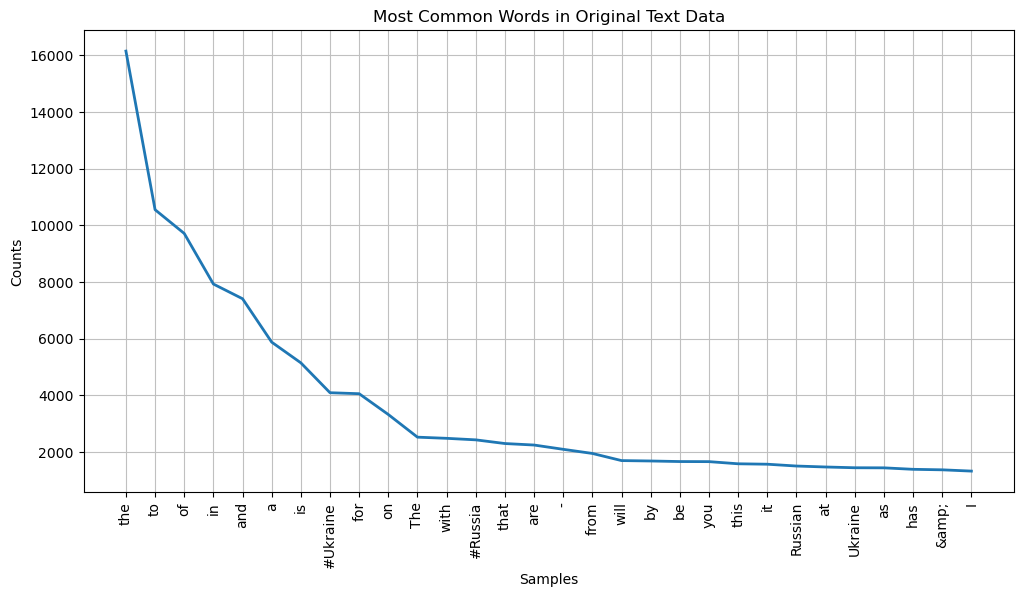

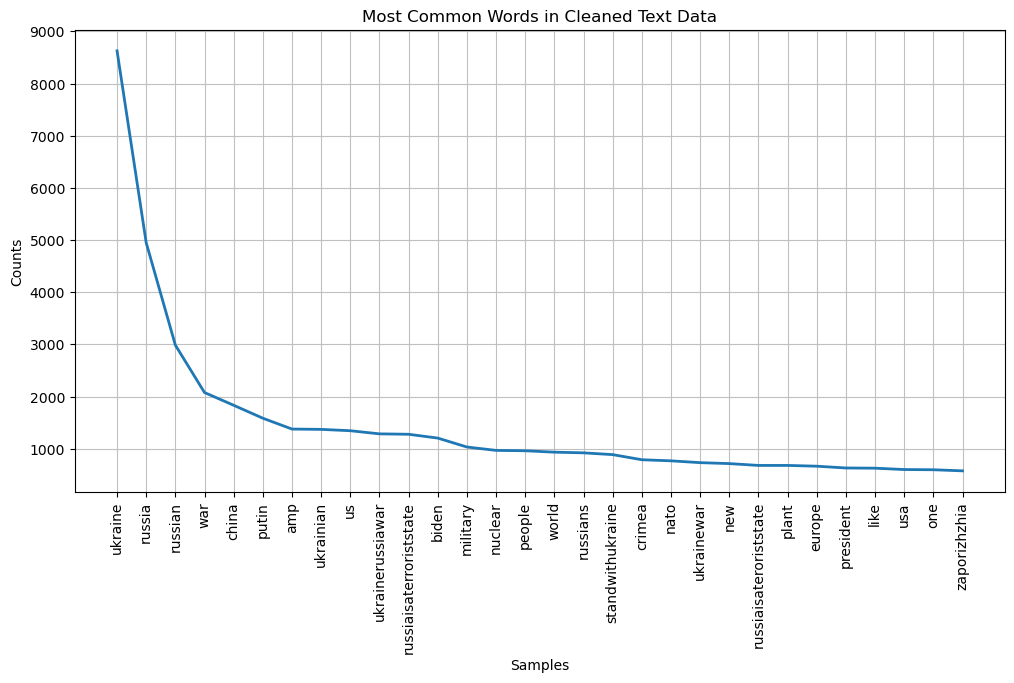

In [180]:
# 3. Comparing the frequency and type of most used words of the original text data and the cleaned text data:
original_words = []
cleaned_words = []

for text in df_original['text']:
    for word in text.split():
        original_words.append(word)

for text in df['text']:
    for word in text.split():
        cleaned_words.append(re.sub(r'[^a-zA-Z\s]', '', word).lower())

original_word_freq = FreqDist(original_words)
cleaned_word_freq = FreqDist(cleaned_words)

plt.figure(figsize=(12, 6))
original_word_freq.plot(30, title='Most Common Words in Original Text Data')
plt.show()

plt.figure(figsize=(12, 6))
cleaned_word_freq.plot(30, title='Most Common Words in Cleaned Text Data')
plt.show()

In [181]:
##############################################
# Sentiment Analysis

In [182]:
# Using a pre-trained sentiment analysis model TextBlob to analyze the sentiment of each tweet and 
# assigning a positive or negative label.
# Defining a function to calculate the sentiment polarity of each tweet
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Applying the get_sentiment function to the 'text' column of the dataframe
df['sentiment'] = df['text'].apply(get_sentiment)

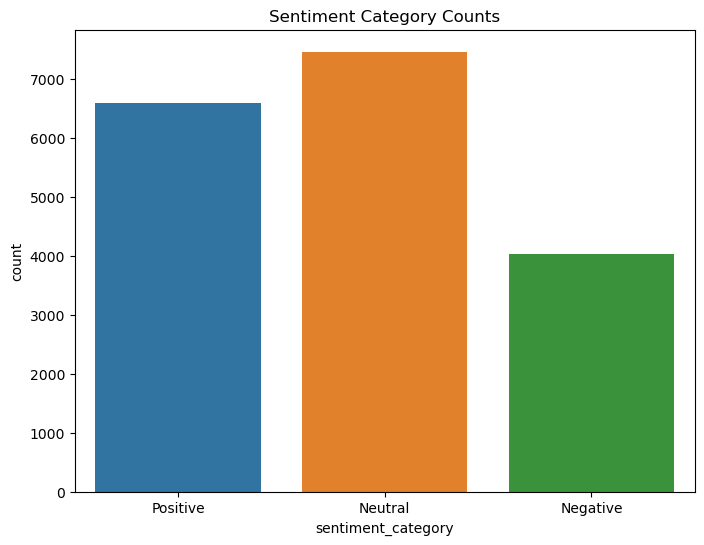

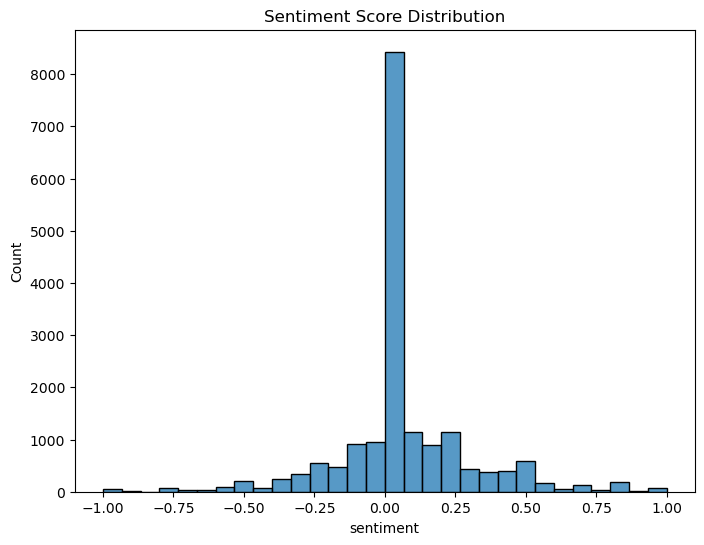

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defining a function to assign sentiment categories
def get_sentiment_category(score):
    if score < 0:
        return 'Negative'
    elif score > 0:
        return 'Positive'
    else:
        return 'Neutral'

# Applying the get_sentiment_category function to the 'sentiment' column
df['sentiment_category'] = df['sentiment'].apply(get_sentiment_category)

# Bar Plot
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment_category', data=df)
plt.title('Sentiment Category Counts')
plt.show()

# Histogram
plt.figure(figsize=(8,6))
sns.histplot(df['sentiment'], kde=False, bins=30)
plt.title('Sentiment Score Distribution')
plt.show()


In [184]:
# Defining a function to assign sentiment categories
def get_sentiment_category(score):
    if score < 0:
        return 'Negative'
    elif score > 0:
        return 'Positive'
    else:
        return 'Neutral'

# Applying the get_sentiment_category function to the 'sentiment' column
df['sentiment_category'] = df['sentiment'].apply(get_sentiment_category)

# Getting the count of each category
category_counts = df['sentiment_category'].value_counts()
print("Category Counts:")
print(category_counts)

# Getting the percentage of each category
category_percentage = df['sentiment_category'].value_counts(normalize=True) * 100
print("\nCategory Percentage:")
print(category_percentage)


Category Counts:
Neutral     7459
Positive    6592
Negative    4029
Name: sentiment_category, dtype: int64

Category Percentage:
Neutral     41.255531
Positive    36.460177
Negative    22.284292
Name: sentiment_category, dtype: float64


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18080 entries, 0 to 47993
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   userid                   18080 non-null  int64  
 1   username                 18080 non-null  object 
 2   acctdesc                 16486 non-null  object 
 3   location                 11801 non-null  object 
 4   following                18080 non-null  int64  
 5   followers                18080 non-null  int64  
 6   totaltweets              18080 non-null  int64  
 7   usercreatedts            18080 non-null  object 
 8   tweetid                  18080 non-null  int64  
 9   tweetcreatedts           18080 non-null  object 
 10  retweetcount             18080 non-null  int64  
 11  text                     18080 non-null  object 
 12  hashtags                 18080 non-null  object 
 13  coordinates              4 non-null      object 
 14  favorite_count        

In [186]:
##############################################
##############################################
# Creating ML MODEL
##############################################
##############################################

In [187]:
##############################################
# Splitting the data

In [188]:
X = df.drop('sentiment', axis = 1)
y = df['sentiment']

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X['text'], y, random_state = 42)

In [190]:
X_train.head()

27339    gnrtvty mylesbyrne lrava vegasrenegade visegra...
36003    sannamarin perfect face western militarism nat...
46670    russians pay big price rapes murders terrorism...
29090    estonias president alar karis joining voluntee...
44399    cryptodrftng imagine much grain would flowing ...
Name: text, dtype: object

In [191]:
##############################################
# COUNT VECTORIZATION

In [192]:
# Using the CountVectorizer
cvect = CountVectorizer()
dtm = cvect.fit_transform(X_train)
pd.DataFrame(dtm.toarray(), columns = cvect.get_feature_names_out()).head()

,aa,aaaaaaaand,aaf,aah,aalimov,aamaadmiparty,aamir,aamirkhan,aana,aanes,...,zumba,zumbis,zurich,zuzanacaputova,zvezda,zvikaklein,zvo,zz,zzeldazdenka,zzzaikar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
# To ensure that the GridSearchCV object will interpret the target variable as a classification problem and not 
# as a regression problem, I will convert the continuous sentiment scores into discrete classes (positive, negative,
# neutral), before passing them to the fit() method. 
# Converting the sentiment scores based on a threshold value
def get_sentiment_class(score, threshold=0.0):
    if score > threshold:
        return 'positive'
    elif score < -threshold:
        return 'negative'
    else:
        return 'neutral'

# Applying this function to the y_train variable to convert the sentiment scores into classes
y_train_class = y_train.apply(lambda x: get_sentiment_class(x, threshold=0.2))

In [194]:
# Defining pipeline and parameter grid for LogisticRegression
lr_pipe = Pipeline([('cvect', CountVectorizer()), ('lgr', LogisticRegression())])
lr_params = {
    'cvect__max_features': [100, 500, 1000, 2000],
    'cvect__stop_words': ['english', None],
    'lgr__penalty': ['l1', 'l2'],
    'lgr__C': [0.1, 1, 10]
}

# Defining pipeline and parameter grid for DecisionTreeClassifier
dt_pipe = Pipeline([('cvect', CountVectorizer()), ('dtc', DecisionTreeClassifier())])
dt_params = {
    'cvect__max_features': [100, 500, 1000, 2000],
    'cvect__stop_words': ['english', None],
    'dtc__criterion': ['gini', 'entropy'],
    'dtc__max_depth': [None, 5, 10]
}

# Defining pipeline and parameter grid for MultinomialNB
nb_pipe = Pipeline([('cvect', CountVectorizer()), ('mnb', MultinomialNB())])
nb_params = {
    'cvect__max_features': [100, 500, 1000, 2000],
    'cvect__stop_words': ['english', None],
    'mnb__alpha': [0.1, 1, 10]
}

# Fitting the data and find best parameters for LogisticRegression
grid_lr = GridSearchCV(lr_pipe, lr_params, cv=5, n_jobs=-1, refit=True)
grid_lr.fit(X_train, y_train_class)
print("Best parameters for Logistic Regression: ", grid_lr.best_params_)
print("Best score for Logistic Regression: ", grid_lr.best_score_)
print("Fitting time for Logistic Regression: ", grid_lr.refit_time_)

# Fitting the data and find best parameters for DecisionTreeClassifier
grid_dt = GridSearchCV(dt_pipe, dt_params, cv=5, n_jobs=-1, refit=True)
grid_dt.fit(X_train, y_train_class)
print("Best parameters for Decision Tree Classifier: ", grid_dt.best_params_)
print("Best score for Decision Tree Classifier: ", grid_dt.best_score_)
print("Fitting time for Decision Tree Classifier: ", grid_dt.refit_time_)

# Fitting the data and find best parameters for MultinomialNB
grid_nb = GridSearchCV(nb_pipe, nb_params, cv=5, n_jobs=-1, refit=True)
grid_nb.fit(X_train, y_train_class)
print("Best parameters for MultinomialNB: ", grid_nb.best_params_)
print("Best score for MultinomialNB: ", grid_nb.best_score_)
print("Fitting time for MultinomialNB: ", grid_nb.refit_time_)

# Creating a list of dictionaries containing the results for each model
results = [
    {'Model': 'Logistic Regression', 'Best Parameters': grid_lr.best_params_, 'Best Score': grid_lr.best_score_, 'Time to Fit Data': grid_lr.refit_time_},
    {'Model': 'Decision Tree', 'Best Parameters': grid_dt.best_params_, 'Best Score': grid_dt.best_score_, 'Time to Fit Data': grid_dt.refit_time_},
    {'Model': 'MultinomialNB', 'Best Parameters': grid_nb.best_params_, 'Best Score': grid_nb.best_score_, 'Time to Fit Data': grid_nb.refit_time_}
]

# Creating a DataFrame from the list of dictionaries and save it as a spreadsheet
results_df = pd.DataFrame(results)

# Seting the display options
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.max_colwidth', None) # Show full width of each column

# Loading and display the dataframe
results_df.head()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best parameters for Logistic Regression:  {'cvect__max_features': 2000, 'cvect__stop_words': None, 'lgr__C': 1, 'lgr__penalty': 'l2'}
Best score for Logistic Regression:  0.8447640117994102
Fitting time for Logistic Regression:  0.3873469829559326
Best parameters for Decision Tree Classifier:  {'cvect__max_features': 2000, 'cvect__stop_words': None, 'dtc__criterion': 'gini', 'dtc__max_depth': None}
Best score for Decision Tree Classifier:  0.8211651917404129
Fitting time for Decision Tree Classifier:  1.0200908184051514
Best parameters for MultinomialNB:  {'cvect__max_features': 2000, 'cvect__stop_words': None, 'mnb__alpha': 0.1}
Best score for MultinomialNB:  0.7900442477876106
Fitting time for MultinomialNB:  0.1810619831085205


,Model,Best Parameters,Best Score,Time to Fit Data
0,Logistic Regression,"{'cvect__max_features': 2000, 'cvect__stop_words': None, 'lgr__C': 1, 'lgr__penalty': 'l2'}",0.844764,0.387347
1,Decision Tree,"{'cvect__max_features': 2000, 'cvect__stop_words': None, 'dtc__criterion': 'gini', 'dtc__max_depth': None}",0.821165,1.020091
2,MultinomialNB,"{'cvect__max_features': 2000, 'cvect__stop_words': None, 'mnb__alpha': 0.1}",0.790044,0.181062


In [195]:
##############################################
# TF-IDF

In [196]:
# Defining pipeline and parameter grid for LogisticRegression
lr_pipe = Pipeline([('tfidf', TfidfVectorizer()), ('lgr', LogisticRegression())])
lr_params = {
    'tfidf__max_features': [100, 500, 1000, 2000],
    'tfidf__stop_words': ['english', None],
    'lgr__penalty': ['l1', 'l2'],
    'lgr__C': [0.1, 1, 10]
}

# Defining pipeline and parameter grid for DecisionTreeClassifier
dt_pipe = Pipeline([('tfidf', TfidfVectorizer()), ('dtc', DecisionTreeClassifier())])
dt_params = {
    'tfidf__max_features': [100, 500, 1000, 2000],
    'tfidf__stop_words': ['english', None],
    'dtc__criterion': ['gini', 'entropy'],
    'dtc__max_depth': [None, 5, 10]
}

# Defining pipeline and parameter grid for MultinomialNB
nb_pipe = Pipeline([('tfidf', TfidfVectorizer()), ('mnb', MultinomialNB())])
nb_params = {
    'tfidf__max_features': [100, 500, 1000, 2000],
    'tfidf__stop_words': ['english', None],
    'mnb__alpha': [0.1, 1, 10]
}

# Fitting the data and find best parameters for LogisticRegression
grid_lr = GridSearchCV(lr_pipe, lr_params, cv=5, n_jobs=-1, refit=True)
grid_lr.fit(X_train, y_train_class)
print("Best parameters for Logistic Regression: ", grid_lr.best_params_)
print("Best score for Logistic Regression: ", grid_lr.best_score_)
print("Fitting time for Logistic Regression: ", grid_lr.refit_time_)

# Fitting the data and find best parameters for DecisionTreeClassifier
grid_dt = GridSearchCV(dt_pipe, dt_params, cv=5, n_jobs=-1, refit=True)
grid_dt.fit(X_train, y_train_class)
print("Best parameters for Decision Tree Classifier: ", grid_dt.best_params_)
print("Best score for Decision Tree Classifier: ", grid_dt.best_score_)
print("Fitting time for Decision Tree Classifier: ", grid_dt.refit_time_)

# Fitting the data and find best parameters for MultinomialNB
grid_nb = GridSearchCV(nb_pipe, nb_params, cv=5, n_jobs=-1, refit=True)
grid_nb.fit(X_train, y_train_class)
print("Best parameters for MultinomialNB: ", grid_nb.best_params_)
print("Best score for MultinomialNB: ", grid_nb.best_score_)
print("Fitting time for MultinomialNB: ", grid_nb.refit_time_)

# Creating a list of dictionaries containing the results for each model
results = [
    {'Model': 'Logistic Regression', 'Best Parameters': grid_lr.best_params_, 'Best Score': grid_lr.best_score_, 'Time to Fit Data': grid_lr.refit_time_},
    {'Model': 'Decision Tree', 'Best Parameters': grid_dt.best_params_, 'Best Score': grid_dt.best_score_, 'Time to Fit Data': grid_dt.refit_time_},
    {'Model': 'MultinomialNB', 'Best Parameters': grid_nb.best_params_, 'Best Score': grid_nb.best_score_, 'Time to Fit Data': grid_nb.refit_time_}
]

# Creating a DataFrame from the list of dictionaries and save it as a spreadsheet
results_df = pd.DataFrame(results)

# Seting the display options
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.max_colwidth', None) # Show full width of each column

# Loading and displaying the dataframe
results_df.head()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best parameters for Logistic Regression:  {'lgr__C': 10, 'lgr__penalty': 'l2', 'tfidf__max_features': 2000, 'tfidf__stop_words': None}
Best score for Logistic Regression:  0.8483038348082597
Fitting time for Logistic Regression:  0.39557719230651855
Best parameters for Decision Tree Classifier:  {'dtc__criterion': 'entropy', 'dtc__max_depth': None, 'tfidf__max_features': 2000, 'tfidf__stop_words': None}
Best score for Decision Tree Classifier:  0.816150442477876
Fitting time for Decision Tree Classifier:  2.0280697345733643
Best parameters for MultinomialNB:  {'mnb__alpha': 0.1, 'tfidf__max_features': 2000, 'tfidf__stop_words': 'english'}
Best score for MultinomialNB:  0.7965339233038348
Fitting time for MultinomialNB:  0.199476957321167


,Model,Best Parameters,Best Score,Time to Fit Data
0,Logistic Regression,"{'lgr__C': 10, 'lgr__penalty': 'l2', 'tfidf__max_features': 2000, 'tfidf__stop_words': None}",0.848304,0.395577
1,Decision Tree,"{'dtc__criterion': 'entropy', 'dtc__max_depth': None, 'tfidf__max_features': 2000, 'tfidf__stop_words': None}",0.816150,2.028070
2,MultinomialNB,"{'mnb__alpha': 0.1, 'tfidf__max_features': 2000, 'tfidf__stop_words': 'english'}",0.796534,0.199477


In [197]:
##############################################
##############################################
# BEST ML MODEL
# For a tweet sentiment classification task to get the best model is to use vectorization to preprocess the text data,
# and use Multinomial Naive Bayes classifier with following settings:
# *'cvect__max_features' ( maximum number of features to be extracted by the CountVectorizer): 2000,
# *'cvect__stop_words': None, which means no stop words will be removed,
# *'mnb__alpha' (the smoothing parameter for the Multinomial Naive Bayes model): 10, which means a relatively high 
#.  degree of smoothing will be applied.
# This model achieved the best accuracy of about 79.24%. Interestingly enough it also had the best time to fit data: 
# 0.245960.
##############################################
##############################################

In [198]:
##############################################
# Comparing sentiment across users based on their geographical location. Hopefully I will identify differences 
# in sentiment and understand how different groups of people are reacting to the topic.

In [199]:
# Filtering out the rows where the location is null as they won't be useful for our analysis.

# Checking for missing values in the entire dataframe
print(df.isnull().values.any())

# Checking for missing values in each column
print(df.isnull().sum())

True
userid                         0
username                       0
acctdesc                    1594
location                    6279
following                      0
followers                      0
totaltweets                    0
usercreatedts                  0
tweetid                        0
tweetcreatedts                 0
retweetcount                   0
text                           0
hashtags                       0
coordinates                18076
favorite_count                 0
is_retweet                     0
original_tweet_id              0
original_tweet_userid          0
original_tweet_username    18080
in_reply_to_status_id          0
in_reply_to_user_id            0
in_reply_to_screen_name    13196
is_quote_status                0
quoted_status_id               0
quoted_status_userid           0
quoted_status_username     15459
extractedts                    0
tokens                         0
lemmatized                     0
stemmed                        0
senti

In [200]:
# Droping rows with missing values in the 'location' column
df = df.dropna(subset=['location'])

# Counting the number of missing values in the 'location' column
print(df['location'].isnull().sum())

0


In [201]:
# The goal is to get at least 5,000 records for some countries that will tell us a story

In [202]:
# Geting the number of unique values in the 'location' column
num_locations = df['location'].nunique()

# Printing the number of unique values
print("The 'location' column has", num_locations, "unique values.")

The 'location' column has 3011 unique values.


In [203]:
# Exploring what are the most frequent words
from collections import Counter

# Concatenating all values in the 'location' column to a single string
text = ' '.join(df['location'].astype(str))

# Useing the Counter class to count the frequency of each word in the string
word_counts = Counter(text.split())

# Useing the most_common method of the Counter class to get a list of the most common words and their frequencies
most_common_words = word_counts.most_common()
print(most_common_words)


[('Ukraine', 849), ('USA', 729), ('United', 435), ('India', 346), ('New', 314), ('Україна', 299), ('Earth', 298), ('States', 274), ('CA', 248), ('England', 241), ('in', 236), ('the', 232), ('The', 226), ('London', 200), ('of', 197), ('Colorado,', 187), ('Planet', 184), ('UK', 176), ('DC', 169), ('Washington,', 161), ('North', 154), ('Kingdom', 154), ('Canada', 151), ('Украина', 147), ('London,', 144), ('Kyiv,', 142), ('Florida', 126), ('York,', 120), ('San', 120), ('NY', 120), ('World', 114), ('FL', 113), ('Germany', 111), ('Kyiv', 107), ('Belgium', 107), ('China', 105), ('France', 105), ('Global', 101), ('Internet', 95), ('South', 94), ('USA,', 91), ('Europe', 83), ('Netherlands', 82), ('Weston,', 80), ('Lost', 79), ('-', 79), ('Woods', 74), ('Cape', 74), ('California', 74), ('Beijing,', 74), ('&', 73), ('Minnesota', 72), ('York', 69), ('Everywhere', 67), ('Las', 65), ('and', 64), ('Vegas,', 64), ('Washington', 63), ('Хай', 62), ('живе', 62), ('NV', 61), ('🇺🇸', 61), ('Namur,', 61), ('

In [204]:
# Grouping the locations by country.
# Creating a boolean mask for matching values
mask = df['location'].str.contains('United States|USA|🇺🇸|usa|Alabama|Alaska|Arizona|Arkansas|California|Colorado|Connecticut|Delaware|Florida|Georgia|Hawaii|Idaho|Illinois|Indiana|Iowa|Kansas|Kentucky|Louisiana|Maine|Maryland|Massachusetts|Michigan|Minnesota|Mississippi|Missouri|Montana|Nebraska|Nevada|New Hampshire|New Jersey|New Mexico|New York|North Carolina|North Dakota|Ohio|Oklahoma|Oregon|Pennsylvania|Rhode Island|South Carolina|South Dakota|Tennessee|Texas|Utah|Vermont|Virginia|Washington|West Virginia|Wisconsin|Wyoming|AL|AK|AZ|AR|CO|CT|DE|GA|HI|ID|IL|IN|IA|KS|KY|LA|ME|MD|MA|MI|MN|MS|MO|MT|NE|NV|NH|NJ|NM|NY|NC|ND|OH|OK|OR|PA|RI|SC|SD|TN|TX|UT|VT|VA|WA|WV|WI|WY|San Francisco|Los Angeles|🇺🇸|Humboldt|Coral', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'USA'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Україна|Ukraine|🇷🇼|🇺🇦|Kyiv|Kiev|Kharkiv|Харьков|Украина|Київ|Lviv', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Ukraine'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('England|🇬🇧|London|UK|United Kingdom|Scotland|Wales|London|Birmingham|Liverpool|Nottingham|Sheffield|Bristol|Glasgow|LeicesterEdinburgh', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'England'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('India|🇮🇳|Delhi|Mumbai|Bangalore|Bengaluru|Hyderabad|Kochi', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'India'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Earth|Internet|Global|World|Europe|A point in the infinite cosmos|Everywhere|FOLLOW|church|STAR|Intestine.|reflect|t@betterbanned.com|52|EU|2006|p/t|Forbidden|Somewhere|Neverland|Africa|worldwide|23|xxx|Manna-hata|Fighting|Bath|world|Rosh|10|h̤͓̺̲͢͡è̷̶͔͔̲̪̯ľ̺͚̬̞͓̇̃͗͏̡̀l|Home', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Misc.'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Germany|Deutschland|Berlin|Munich|Bonn|Frankfurt', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Germany'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('France|🇧🇪|Paris|Marseille|Lyon|Toulouse|Nice|Nantes|Montpellier|Strasbourg|Bordeaux|Lille', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'France'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Netherlands|NL|Nederland', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Netherlands'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('China|Beijing|Shanghai|Singapore|Hong Kong', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'China'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('South Africa|RPA', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'South Africa'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Sweden|Sverige|Stockholm|Goteborg', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Sweden'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Russia|Россия|Moscow', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Russia'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Switzerland|Suisse|Zürich|Geneva|Basel|Lausanne|Bern|Winterthur|Lucerne|Gallen', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Switzerland'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Belgium|Brussels|België|Belgique', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Belgium'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Canada|Toronto|Ottawa|Alberta|🇨🇦', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Canada'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Nigeria|Port Harcourt', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Nigeria'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Australia|Melbourne', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Australia'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Ireland|Dublin|Belfast|Cork|Galway|Craigavon|Waterford|Drogheda', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Ireland'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Italia|Italy|Rome|Milan|Venice|Porto San Giorgio|Udine', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Italy'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Kenya', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Kenya'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Pakistan|Karachi', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Pakistan'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Greece', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Greece'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Romania|România', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Romania'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Iceland|IS', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Iceland'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Japan|Tokyo|Kyoto|Saitama|Hiroshima|Sendai|Chiba', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Japan'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Romania', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Romania'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Spain|Madrid|Barcelona|España|🇪🇦🇪🇦🇪🇦', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Spain'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Finland|Helsinki', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Finland'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('Poland|🇵🇱|Polska|Warsaw|Zagan|Gdansk|Szczecin|Cracow|Krakow|Wroclaw|Poznan', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'Poland'

# Creating a boolean mask for matching values
mask = df['location'].str.contains('UAE|𝑼𝑨𝑬|UA|United Arab Emirates|Dubai|Abu Dhabi|Sharjah|Al Ain', na=False)

# Replacing matching values with 'USA'
df.loc[mask, 'location'] = 'UAE'


In [205]:
# Geting the value counts of each location 
location_counts = df['location'].value_counts()  

# Geting the top 50 locations and their counts 
top_50_locations = location_counts.head(50)  
# Print the top 50 locations and their counts 
print(top_50_locations)   

# Geting the number of unique values in the 'location' column 
num_locations = df['location'].nunique()  
# Print the number of unique values 
print("The 'location' column has", num_locations, "unique values.")


USA                       2941
Ukraine                   1578
Misc.                     1288
England                    846
India                      396
China                      258
Germany                    213
Canada                     209
Belgium                    169
France                     134
Netherlands                130
Russia                     101
Switzerland                 94
Australia                   85
Nigeria                     84
Italy                       82
Ireland                     80
Sweden                      78
Pakistan                    75
UAE                         55
Poland                      45
Finland                     44
Kenya                       41
Spain                       40
Greece                      33
Romania                     31
♥ ɐlǝnzǝuǝΛ ♋               28
Boston                      26
Japan                       24
Sri Lanka                   23
US                          21
Kremlin                     18
Burbank,

In [206]:
# Grouping by location and calculate mean sentiment score
location_sentiment = df.groupby('location')['sentiment'].mean().reset_index()

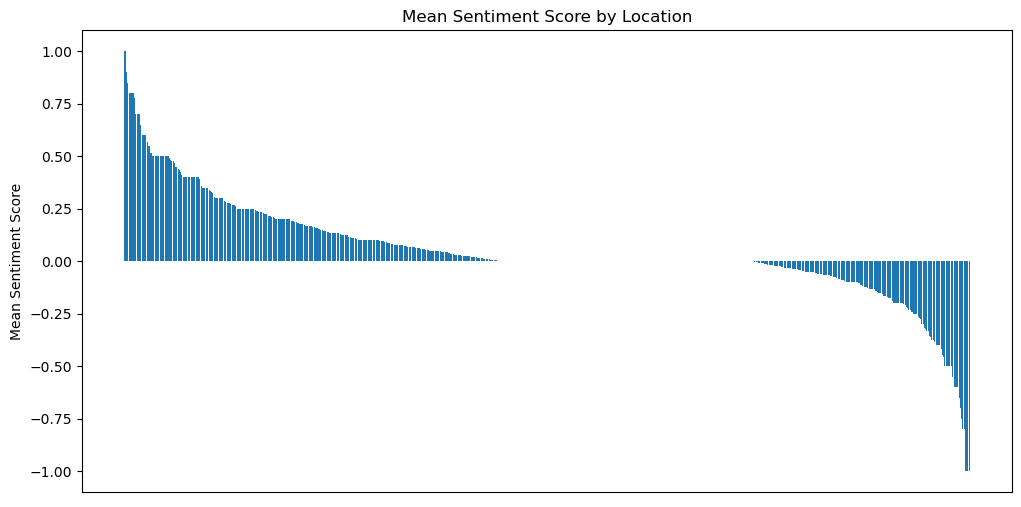

In [207]:
# Sorting locations by mean sentiment score in descending order
location_sentiment = location_sentiment.sort_values('sentiment', ascending=False)

# Setting the figure size
plt.figure(figsize=(12,6))

# Creating a bar plot of mean sentiment score by location
plt.bar(location_sentiment['location'], location_sentiment['sentiment'])

# Setting the title and axis labels
plt.title('Mean Sentiment Score by Location')
plt.ylabel('Mean Sentiment Score')

# Removing the x-axis ticks and labels
plt.xticks([], [])

# Showing the plot
plt.show()


In [208]:
# In the chart above since there were over 3000 x values I decided not to list them. We clearly can see 
# that majority of the sentiment is positive and it is followed by neutral and negative, which translates to
# the majority if the world having a positive sentiment.

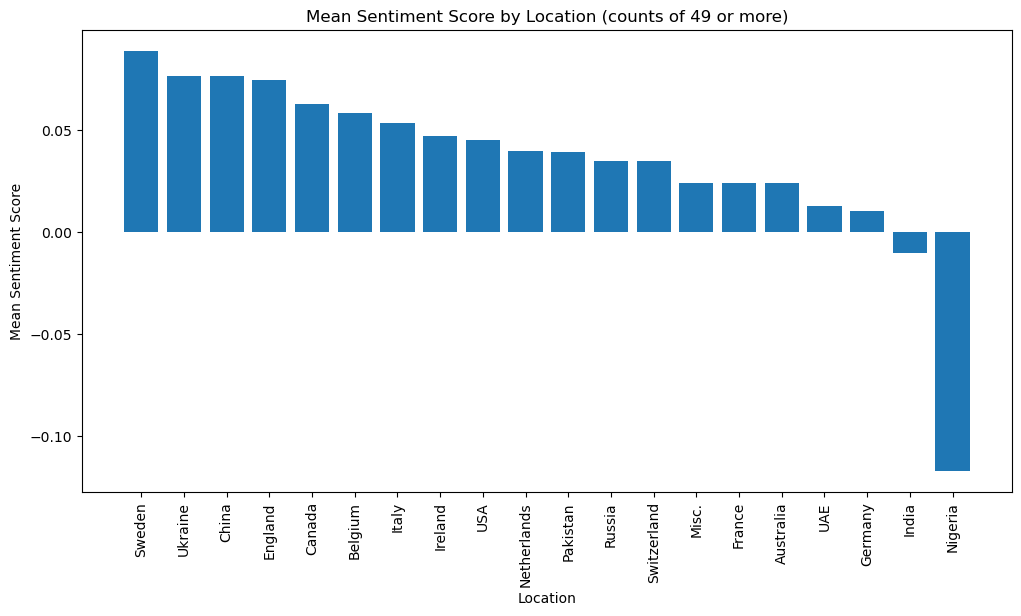

In [209]:
# Geting the value counts of each location 
location_counts = df['location'].value_counts() 

# Filtering locations with counts of 49 or more
filtered_locations = location_counts[location_counts >= 49].index

# Creating a new DataFrame with only the filtered locations
location_sentiment = df[df['location'].isin(filtered_locations)].groupby('location')['sentiment'].mean().reset_index()

# Sorting locations by mean sentiment score in descending order
location_sentiment = location_sentiment.sort_values('sentiment', ascending=False)

# Setting the figure size
plt.figure(figsize=(12,6))

# Creating a bar plot of mean sentiment score by location
plt.bar(location_sentiment['location'], location_sentiment['sentiment'])

# Setting the title and axis labels
plt.title('Mean Sentiment Score by Location (counts of 49 or more)')
plt.xlabel('Location')
plt.ylabel('Mean Sentiment Score')

# Rotating the x labels by 90 degrees
plt.xticks(rotation=90)

# Showing the plot
plt.show()


In [210]:
# The above plot shows countries' sentiment as well but only for the countriesthat had 49+ combined frequency. 
# The most positive sentiment shows Englad that is followed by USA, Canada and China. It is very interseting
# that the positive sentiment is not very strong and is captured below 0.09 where the maximum scale is 1.0
# The most neutral appears Japa

In [211]:
##############################################
# I will identify key topics and keywords that are driving sentiment. Hopefully I will understand the factors that 
# are driving sentiment.

In [212]:
from gensim import models, corpora

# Creating a list of tweets
tweets = df['text'].tolist()

# Tokenizing the tweets
tokenized_tweets = [tweet.split() for tweet in tweets]

# Creating a dictionary from the tokenized tweets
dictionary = corpora.Dictionary(tokenized_tweets)

# Creating a document-term matrix
doc_term_matrix = [dictionary.doc2bow(tokens) for tokens in tokenized_tweets]

# Creating an LDA model
lda_model = models.LdaModel(doc_term_matrix, num_topics=1, id2word=dictionary, passes=10)

# Geting the topics and their corresponding keywords
topics = lda_model.print_topics(num_words=5)

# Printing the topics and their keywords
for topic in topics:
    print(topic)


(0, '0.024*"ukraine" + 0.013*"russia" + 0.008*"russian" + 0.006*"war" + 0.004*"amp"')


In [213]:
# We just confirmed that the main topic for th tweets is the Ukraine Russia war.

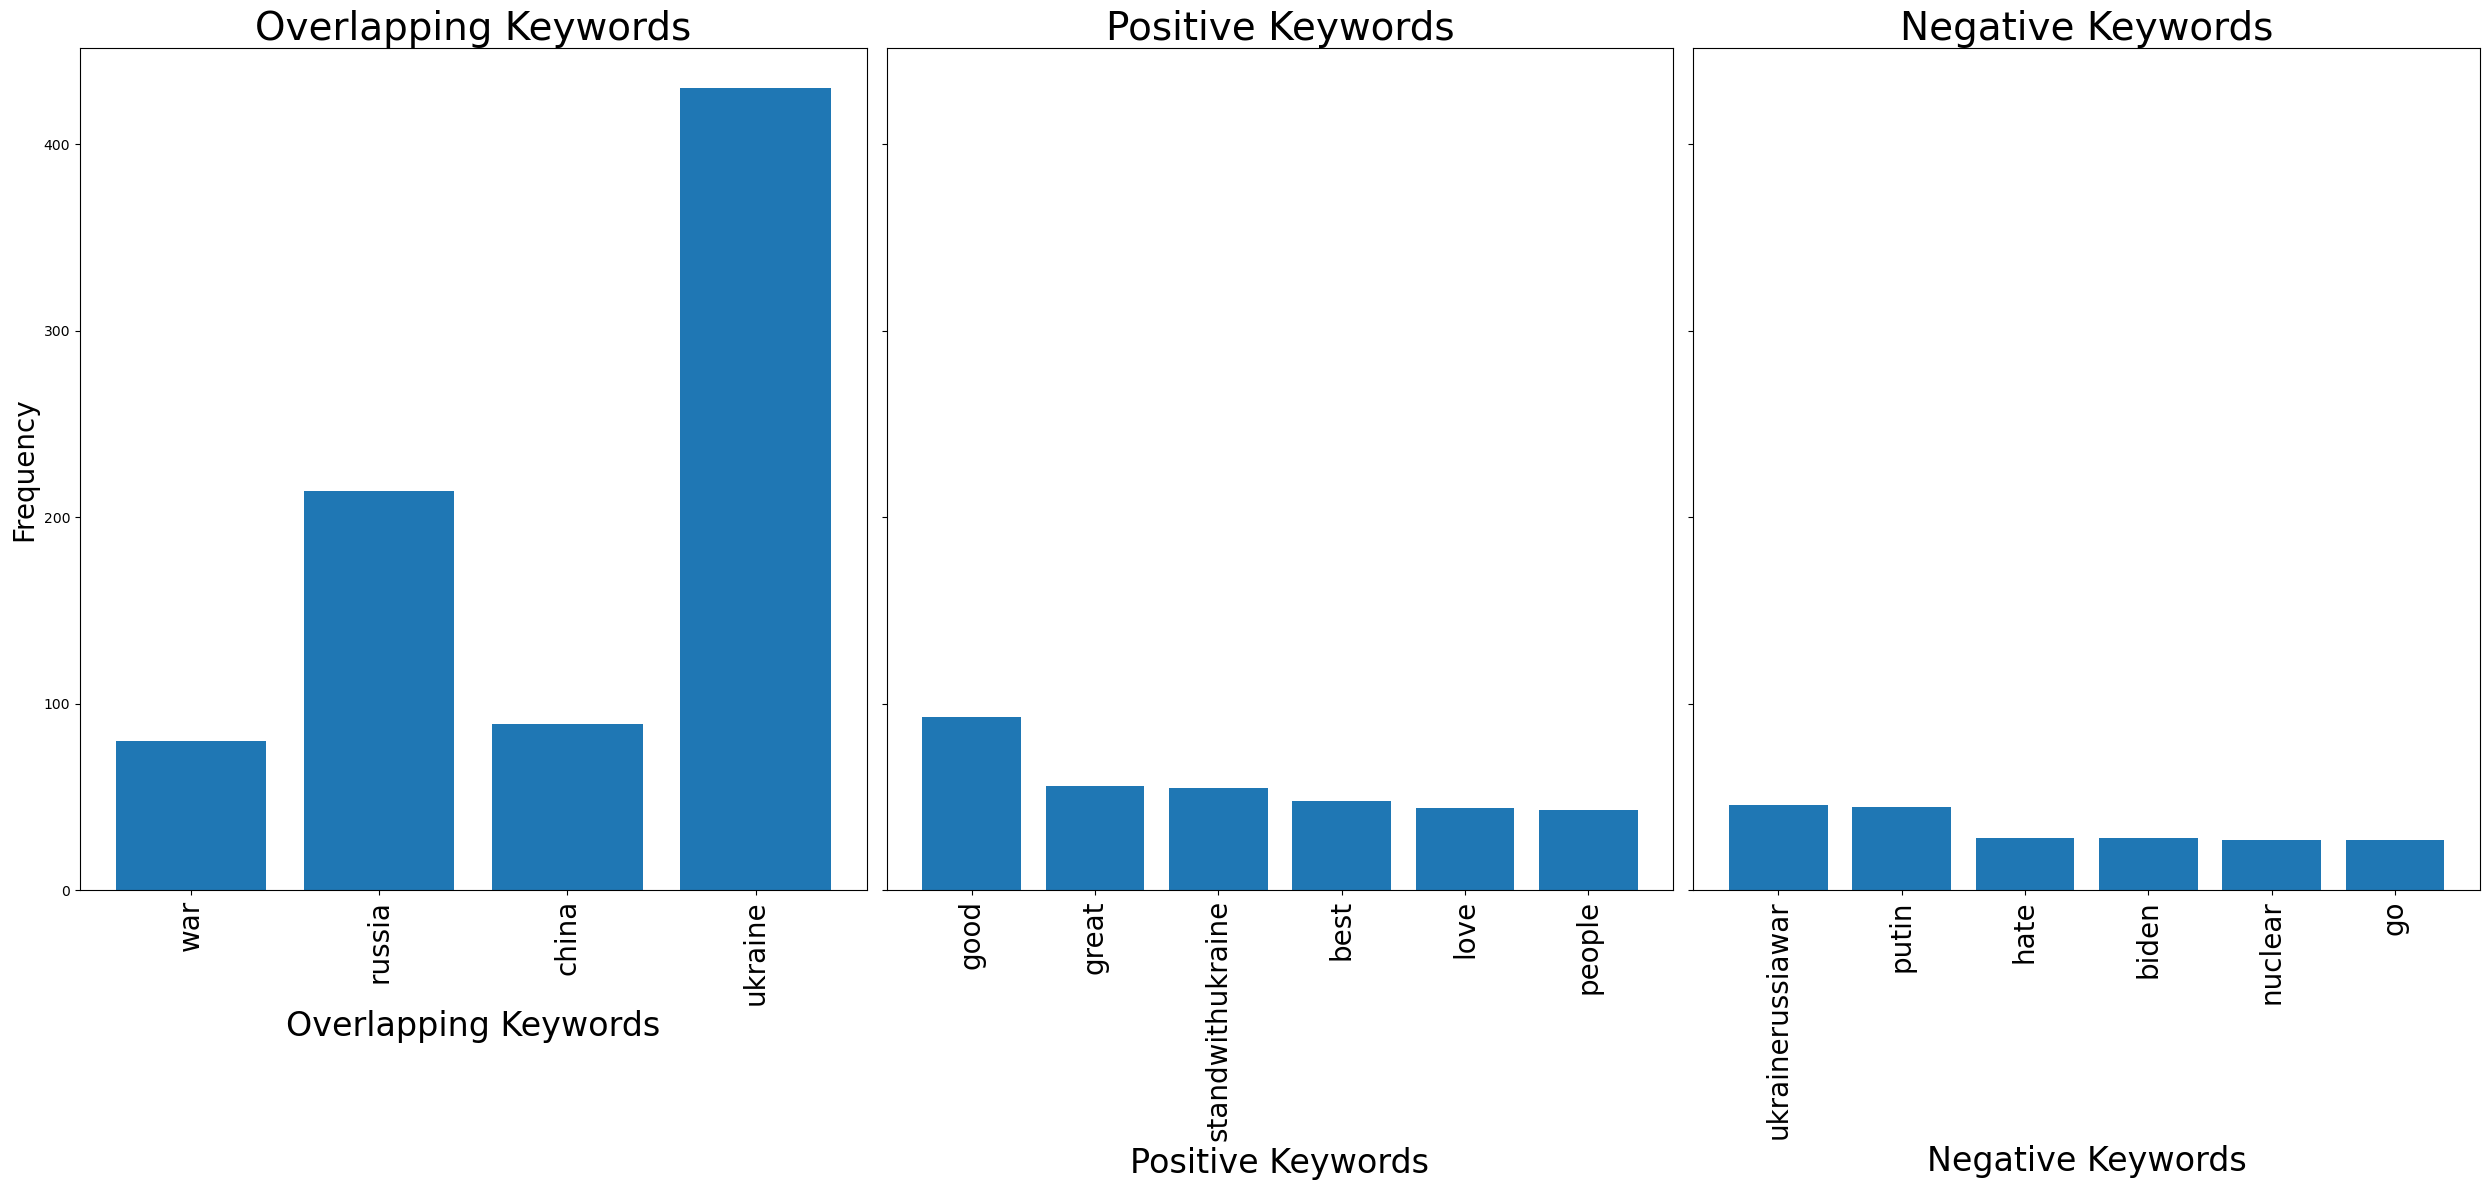

In [214]:
# Checking if 'sentiment' column exists in the DataFrame
if 'sentiment' not in df.columns:
    print("Error: 'sentiment' column does not exist in the DataFrame.")
    exit()

# Filtering tweets with sentiment >= 0.5
positive_tweets = df[df['sentiment'] >= 0.5]['text']

# Concatenating positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Filtering tweets with sentiment <= -0.5
negative_tweets = df[df['sentiment'] <= -0.5]['text']

# Concatenating negative tweets into a single string
negative_text = ' '.join(negative_tweets)

# Creating TextBlob objects for positive and negative text
positive_blob = TextBlob(positive_text)
negative_blob = TextBlob(negative_text)

# Geting the word frequencies for positive and negative text
positive_word_frequencies = positive_blob.word_counts
negative_word_frequencies = negative_blob.word_counts

# Sorting the word frequencies in descending order for positive and negative text
sorted_positive_words = sorted(positive_word_frequencies.items(), key=lambda x: x[1], reverse=True)
sorted_negative_words = sorted(negative_word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Creating dictionaries for positive and negative word frequencies
positive_word_freq = dict(sorted_positive_words[:10])
negative_word_freq = dict(sorted_negative_words[:10])

# Geting the top 10 words driving positive sentiment
top_positive_words = [word for word, _ in sorted_positive_words[:10]]

# Geting the top 10 words driving negative sentiment
top_negative_words = [word for word, _ in sorted_negative_words[:10]]

# Geting the top 10 words in positive sentiment but not in negative sentiment
positive_unique_words = [word for word in top_positive_words if word not in top_negative_words]

# Geting the top 10 words in negative sentiment but not in positive sentiment
negative_unique_words = [word for word in top_negative_words if word not in top_positive_words]

# Geting the overlapping keywords in the top 10 for positive and negative sentiment
overlapping_keywords = set(top_positive_words).intersection(set(top_negative_words))

# Overlapping keywords list
overlapping_keywords_list = list(overlapping_keywords)

# Creating subplots with shared y-axis
fig, axes = plt.subplots(1, 3, figsize=(25, 12), sharey=True)

# Plot 1: Overlapping keywords
axes[0].bar(overlapping_keywords_list, [positive_word_freq.get(word, 0) + negative_word_freq.get(word, 0) for word in overlapping_keywords_list])
axes[0].set_xlabel('Overlapping Keywords', fontsize=24)
axes[0].set_title('Overlapping Keywords', fontsize=28)

# Plot 2: Top 10 keywords in positive sentiment but not in negative sentiment
axes[1].bar(positive_unique_words, [positive_word_freq.get(word, 0) for word in positive_unique_words])
axes[1].set_xlabel('Positive Keywords', fontsize=24)
axes[1].set_title('Positive Keywords', fontsize=28)

# Plot 3: Top 10 keywords in negative sentiment but not in positive sentiment
axes[2].bar(negative_unique_words, [negative_word_freq.get(word, 0) for word in negative_unique_words])
axes[2].set_xlabel('Negative Keywords', fontsize=24)
axes[2].set_title('Negative Keywords', fontsize=28)

# Seting y-axis title for the first chart
axes[0].set_ylabel('Frequency', fontsize=20)

# Rotating x-axis labels
for ax in axes:
    ax.tick_params(axis='x', rotation=90, labelsize=10)

# Increasing x-axis labels font size for all subplots
for tick in axes[0].get_xticklabels():
    tick.set_fontsize(20)
for tick in axes[1].get_xticklabels():
    tick.set_fontsize(20)
for tick in axes[2].get_xticklabels():
    tick.set_fontsize(20)

plt.tight_layout()
plt.show()

In [215]:
#********MODIFY
# RESULTS
# The overlapping keywords that repeat in the tweets regardles of their sentiment score are: Ukraine, war, 
# Putin, Russia, ukrainerussianwar and china.
# The tweets with positive sentiment have following keywords showing up the most: good, standwithukraine, great, 
# love.
# The tweets with negative sentiment have following keywords showing up the most:: Biden, nuclear, hate and 
# government.
# Knowing the topics and keywords driving sentiment offers us actionable insights for a variety of stakeholders.
# For example:
# * Government Policy Making: Governments can use sentiment analysis to understand public opinion on their 
#.  policies related to the conflict. This can inform decisions about future policy directions and communication 
#   strategies.
# * Diplomatic Strategy: it helps diplomats better frame their communication and strategies.
# * Humanitarian Aid: aid organizations can use it to understand the areas of greatest concern and need.
# * Media Reporting: Media organizations can use it to better understand the public's interests and concerns 
#   about the conflict, and shape their reporting accordingly.
# * Academic Research: Researchers can use it to study public opinion and its impacts on the conflict, 
#  contributing to the broader understanding of conflict dynamics and peace-building efforts.
# * Investment Decisions: businesses can use it to understand how the conflict might impact various industries, 
#   markets, or specific companies, informing investment and strategic decisions.
# * Crisis Management: By understanding public sentiment and its drivers, governments, international organizations, 
#.  and NGOs can anticipate potential escalations or shifts in the conflict and prepare appropriate responses.

In [216]:
##############################################

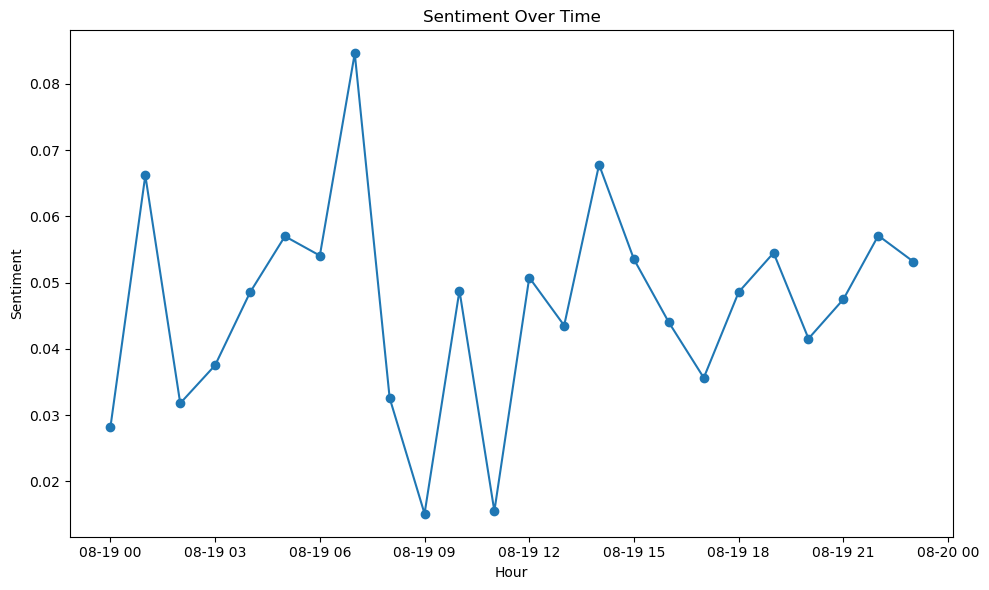

In [217]:
# Visualizing sentiment over time to see how sentiment is changing over time. Hopefully I will identify 
# trends and understand how sentiment is evolving. To achieve that I neet to convert the 'tweetcreatedts' 
# column to datetime format since it is now an object type. Then,I will group by the date to calculate 
# the mean sentiment for each day, and finally, plot this over time.

# Converting 'tweetcreatedts' to datetime
df['tweetcreatedts'] = pd.to_datetime(df['tweetcreatedts'])

# Grouping by date and calculating mean sentiment
df_grouped = df.resample('H', on='tweetcreatedts')['sentiment'].mean().reset_index()

# Plotting
plt.figure(figsize=(10,6))
plt.plot_date(df_grouped['tweetcreatedts'], df_grouped['sentiment'], linestyle='solid')
plt.title('Sentiment Over Time')
plt.xlabel('Hour')
plt.ylabel('Sentiment')
plt.tight_layout()
plt.show()


In [218]:
#********MODIFY
# I grouped the data by hour. The plot shows how the mean sentiment changes over time in the dataset. It looks 
# like the sentiment mean for the day was positive flactuating between 0.03 and 0.09. The sentiment mean was the 
# closest to the neutral state around 11AM and most positive around 3PM.
# If we divided data by the time zones we might be able to observe patterns around people daily activities, 
# for example the sentiment can be st its highest when people are about to live work since they might be excited 
# about their afternoons...